# Desafio 2 - Prediciendo precios de propiedades de CABA

###### Integrantes:  Leonardo Campos, Juan Molinari, Marcos Garcia Verdier, Barbara Malamud

### Importacion de Librerias

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

### Importacion CSV modificado del desafio 1

In [3]:
df = pd.read_csv('properattimodif.csv')

#### Solo nos quedamos con Capital Federal

In [4]:
# Solo nos quedamos con Capital Federal, todos los otros datos del data set los tiramos
df = df.drop(df[df['Provincia']!='Capital Federal'].index)

#### Graficamos correlaciones


sns.set()
cols = ['price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms']
sns.pairplot(df[cols], size = 2)
plt.show()

#### Heat map de correlacion

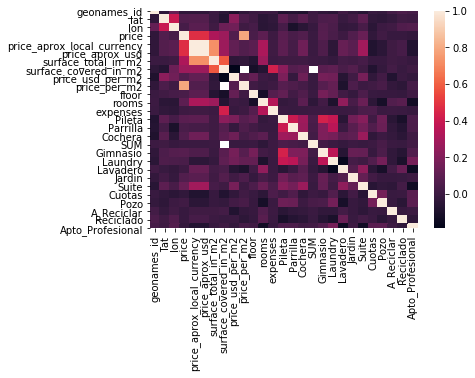

In [5]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

#### Cuantificamos cuantas celdas estan completas en cada columna (%)

In [6]:
pd.set_option('display.max_rows', None)
df.count()/30032

property_type                    1.000000
place_name                       1.000000
country_name                     1.000000
Provincia                        1.000000
geonames_id                      0.959343
lat-lon                          0.758491
lat                              0.758491
lon                              0.758491
price                            0.919985
currency                         0.919985
price_aprox_local_currency       0.919985
price_aprox_usd                  0.919985
surface_total_in_m2              0.807572
surface_covered_in_m2            0.015550
price_usd_per_m2                 0.737147
price_per_m2                     0.865743
floor                            0.099261
rooms                            0.275872
expenses                         0.215137
description                      0.999933
title                            1.000000
pais                             1.000000
provincia                        1.000000
localidad                        0

### Procedimientos adicionales al desafio 1 para completar mas datos

#### Completar columna precio en USD

In [7]:
#Extraemos los precios de la columna description y title para luego completar la columna precio en USD

df_description = df["description"]

df_title = df["title"]

df_description1 = df_description.str.extract(pat = '(\d+\.\d+\s?[$]| \d+\d+\s?[$])', expand=True)

df_description2 = df_description.str.extract(pat = '(\s?[$]*\d+\.*\d+\.\d+)', expand=True)

df_description3 = df_description.str.extract(pat = '([$]\s*\d+ | \d+[$])', expand=True)

df_description4 = df_description.str.extract(pat = '(\s?[dolares]*\d+\.*\d+\.\d+)', expand=True)

df_description5 = df_description.str.extract(pat = '(\d+\,\d+\s?[$]| \d+\d+\s?[$])', expand=True)

df_description = pd.concat([df_description,df_description1,  df_description2, df_description3,df_description4,df_description5],axis=1)

df_description.columns = ['description','1','2','3','4','5']

df_description['1'] = df_description['1'].combine_first(df_description['2'])

df_description['1']= df_description['1'].combine_first(df_description['3'])

df_description['1']= df_description['1'].combine_first(df_description['4'])

df_description['1']= df_description['1'].combine_first(df_description['5'])

df_description = df_description.drop(['2',"3",'4','5'],axis=1)

df_description2 = df_description

df_description2 = df_description['1'].str.extract(pat = '(\d+\.?\d+)', expand=True)

df_description3 = pd.concat([df_description,df_description2],axis=1)

df_description3.columns = ['description','1','2']

df_description3['2'] = df_description3['2'].astype(float)

df_description3['2'] = df_description3['2']*1000

df_description3 = df_description3.drop(['1'],axis=1)

df['price_aprox_usd']= df['price_aprox_usd'].combine_first(df_description3['2'])

df_t1 = df_title.str.extract(pat = '(\d+\.\d+\s?[$]| \d+\d+\s?[$])', expand=True)

df_t2 = df_title.str.extract(pat = '(\s?[$]*\d+\.*\d+\.\d+)', expand=True)

df_t3 = df_title.str.extract(pat = '([$]\s*\d+ | \d+[$])', expand=True)

df_t4 = df_title.str.extract(pat = '(\s?[dolares]*\d+\.*\d+\.\d+)', expand=True)

df_t5 = df_title.str.extract(pat = '(\d+\,\d+\s?[$]| \d+\d+\s?[$])', expand=True)

df_title = pd.concat([df_title,df_t1,  df_t2, df_t3,df_t4,df_t5],axis=1)

df_title.columns = ['title','1','2','3','4','5']

df_title['1'] = df_title['1'].combine_first(df_title['2'])

df_title['1']= df_title['1'].combine_first(df_title['3'])

df_title['1']= df_title['1'].combine_first(df_title['4'])

df_title['1']= df_title['1'].combine_first(df_title['5'])

df_title = df_title.drop(['2',"3",'4','5'],axis=1)

df_t2 = df_title

df_t2 = df_title['1'].str.extract(pat = '(\d+\.?\d+)', expand=True)

df_t3 = pd.concat([df_title,df_t2],axis=1)

df_t3.columns = ['title','1','2']

df_t3['2'] = df_t3['2'].astype(float)

df_t3['2'] = df_t3['2']*1000

df_t3 = df_t3.drop(['1'],axis=1)

df_description3 = pd.concat([df_description3,df_t3],axis=1)

df_description3.columns = ['description','1','title','2']

df_description3['1']= df_description3['1'].combine_first(df_description3['2'])

df_description3 = df_description3.drop(['2'],axis=1)

df['price_aprox_usd']= df['price_aprox_usd'].combine_first(df_description3['1'])

#ver con leo si lo llevamos a price per m2?

#### Lo llevamos a la columna Price usd per m2

In [8]:
#completamos en base el precio total el precio por m2
df['price_usd_per_m2'] = df['price_aprox_usd']/df['surface_total_in_m2'].combine_first(df['price_usd_per_m2'])

df['price_usd_per_m2']= df['price_usd_per_m2'].replace(np.inf, np.nan)

df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,Gimnasio,Laundry,Lavadero,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional
count,2.881100e+04,22779.000000,22779.000000,2.762900e+04,2.762900e+04,2.781900e+04,24253.000000,467.000000,22323.000000,26000.000000,...,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000
mean,3.532324e+06,-34.601322,-58.436087,3.676836e+05,4.529322e+06,2.562298e+05,123.206737,150.745182,2613.568955,5220.181155,...,0.080281,0.136454,0.274507,0.036894,0.187234,0.105621,0.048415,0.022509,0.064531,0.317162
std,5.620645e+05,0.036771,0.053002,1.007306e+06,7.719499e+06,4.362917e+05,1300.917778,267.768832,1183.636392,13197.533240,...,0.271732,0.343276,0.446273,0.188505,0.390105,0.307357,0.214645,0.148335,0.245701,0.465379
min,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,1.100000e+03,10.000000,0.000000,1.725000,3.208556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.429760e+06,-34.620928,-58.465375,1.080000e+05,1.839633e+06,1.040000e+05,43.000000,38.000000,1941.267210,2170.057692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.433775e+06,-34.601769,-58.437037,1.628000e+05,2.734898e+06,1.550000e+05,64.000000,69.000000,2434.782609,2738.636364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.435874e+06,-34.581795,-58.403561,3.000000e+05,4.764015e+06,2.700000e+05,115.000000,140.500000,3000.000000,3482.396739,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.693230e+06,-34.534530,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,2700.000000,15312.500000,480351.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Buscamos completar la informacion de rooms (ambientes)

In [9]:
#buscamos en Title informacion de ambientes (tomamos del grupo 4 esta codificacion para completar mas ambientes)
numeros = {'mono': 1, 'uno':1 , 'un': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez':10}
for  key, value in numeros.items():
   df.loc[:, 'description'] = df.loc[:, 'description'].str.replace(key, str(value))

for  key, value in numeros.items():
   df.loc[:, 'title'] = df.loc[:, 'title'].str.replace(key, str(value))

In [10]:
for  key, value in numeros.items():
   df.loc[:, 'title'] = df.loc[:, 'title'].str.replace(key, str(value))
#pattern_amb =r'(?:(\d+)(?:\s*amb))' #Cambié el codigo acá porque estaba devolviendo todas la palabras que empiezan con amb 
pattern_amb =r'(?:(\d+)\s*(?:amb\s|ambiente|amb.))'

In [11]:
regex_amb = re.compile(pattern_amb)
df['amb_descr'] = df['description'].str.extract(regex_amb, expand=True)
df['amb_titulo'] = df['title'].str.extract(regex_amb, expand=True)
df['amb_titulo'] = df['title'].str.extract(regex_amb, expand=True)
#pattern_cuartos = r'(\s\d+)(?=\s*dorm|\s*cuartos|\s*hab)'
#Cambié el codigo acá porque estaba devolviendo todas la palabras que empiezan con dorm o hab.
pattern_cuartos = r'(\s\d+)\s*(?:dormitorio|dorm.|dorm\s|cuarto|habitacion|hab.|hab\s)'
regex_cuartos = re.compile(pattern_cuartos)
df['cuartos_titulo'] = df['title'].str.extract(regex_cuartos, expand=True)
df['cuartos_descr'] = df['description'].str.extract(regex_cuartos, expand=True)


In [12]:
df['cuartosmasuno_titulo']=df[['cuartos_titulo']].apply(lambda x: (int(x['cuartos_titulo'])+1) if(np.all(pd.notnull(x['cuartos_titulo']))) else x, axis = 1)
df['cuartosmasuno_descr']=df[['cuartos_descr']].apply(lambda x: (int(x['cuartos_descr'])+1) if(np.all(pd.notnull(x['cuartos_descr']))) else x, axis = 1)


In [13]:
df['cuartosmasuno_titulo']=df[['cuartos_titulo']].apply(lambda x: (int(x['cuartos_titulo'])+1) if(np.all(pd.notnull(x['cuartos_titulo']))) else x, axis = 1)
df['cuartosmasuno_descr']=df[['cuartos_descr']].apply(lambda x: (int(x['cuartos_descr'])+1) if(np.all(pd.notnull(x['cuartos_descr']))) else x, axis = 1)
#se crea variable donde amb_desc es nulo y amb_titulo no es nulo
A=df[df.amb_descr.isnull()& df.amb_titulo.notnull()]

#Se reemplazan nulos por no nulos
df.at[A.index,'amb_descr']=A.amb_titulo

#Se repite procedimiento y se completa campo "AMBIENTES" del dataset
B=df[df.rooms.isnull()& df.amb_descr.notnull()]
df.at[B.index,'rooms']=B.amb_descr

C=df[df.cuartos_titulo.isnull()& df.cuartos_descr.notnull()]
df.at[C.index,'cuartos_titulo']=C.cuartos_descr

D=df[df.rooms.isnull()& df.cuartos_titulo.notnull()]
df.at[D.index,'rooms']=D.cuartos_titulo

E= df[df.cuartosmasuno_descr.isnull()& df.cuartosmasuno_titulo.notnull()]
df.at[E.index,'cuartosmasuno_descr']=E.cuartosmasuno_titulo

F=df[df.rooms.isnull()& df.cuartosmasuno_descr.notnull()]
df.at[F.index,'rooms']=F.cuartosmasuno_descr


#### Volvemos a rechequear cuanto completamos

In [14]:
pd.set_option('display.max_rows', None)
df.count()/30032

property_type                    1.000000
place_name                       1.000000
country_name                     1.000000
Provincia                        1.000000
geonames_id                      0.959343
lat-lon                          0.758491
lat                              0.758491
lon                              0.758491
price                            0.919985
currency                         0.919985
price_aprox_local_currency       0.919985
price_aprox_usd                  0.926312
surface_total_in_m2              0.807572
surface_covered_in_m2            0.015550
price_usd_per_m2                 0.743307
price_per_m2                     0.865743
floor                            0.099261
rooms                            0.402637
expenses                         0.215137
description                      0.999933
title                            1.000000
pais                             1.000000
provincia                        1.000000
localidad                        0

In [15]:
pd.reset_option("^display")

#### Empezamos a dropear columnas agregadas para no ensuciar dataset

In [16]:
# dropear las columnas agregadas
df.drop(['amb_descr','cuartos_titulo','cuartos_titulo','cuartos_descr','cuartosmasuno_titulo','cuartosmasuno_descr','cuartiles_superficie_cubierta','amb_titulo'], axis=1,inplace=True, errors='ignore')
df.columns

Index(['property_type', 'place_name', 'country_name', 'Provincia',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'pais', 'provincia',
       'localidad', 'barrio', 'Pileta', 'Parrilla', 'Cochera', 'SUM',
       'Gimnasio', 'Laundry', 'Lavadero', 'Jardin', 'Suite', 'Cuotas', 'Pozo',
       'A_Reciclar', 'Reciclado', 'Apto_Profesional'],
      dtype='object')

### Buscamos completar Rooms

In [17]:
df['rooms']=df['rooms'].astype(float)

df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,Gimnasio,Laundry,Lavadero,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional
count,2.881100e+04,22779.000000,22779.000000,2.762900e+04,2.762900e+04,2.781900e+04,24253.000000,467.000000,22323.000000,26000.000000,...,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000
mean,3.532324e+06,-34.601322,-58.436087,3.676836e+05,4.529322e+06,2.562298e+05,123.206737,150.745182,2613.568955,5220.181155,...,0.080281,0.136454,0.274507,0.036894,0.187234,0.105621,0.048415,0.022509,0.064531,0.317162
std,5.620645e+05,0.036771,0.053002,1.007306e+06,7.719499e+06,4.362917e+05,1300.917778,267.768832,1183.636392,13197.533240,...,0.271732,0.343276,0.446273,0.188505,0.390105,0.307357,0.214645,0.148335,0.245701,0.465379
min,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,1.100000e+03,10.000000,0.000000,1.725000,3.208556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.429760e+06,-34.620928,-58.465375,1.080000e+05,1.839633e+06,1.040000e+05,43.000000,38.000000,1941.267210,2170.057692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.433775e+06,-34.601769,-58.437037,1.628000e+05,2.734898e+06,1.550000e+05,64.000000,69.000000,2434.782609,2738.636364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.435874e+06,-34.581795,-58.403561,3.000000e+05,4.764015e+06,2.700000e+05,115.000000,140.500000,3000.000000,3482.396739,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.693230e+06,-34.534530,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,2700.000000,15312.500000,480351.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Buscamos completar precio USD por M2

In [18]:
df['price_usd_per_m2'] = df['price_aprox_usd']/df['surface_total_in_m2'].combine_first(df['price_usd_per_m2'])

df['price_usd_per_m2']= df['price_usd_per_m2'].replace(np.inf, np.nan)

df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,Gimnasio,Laundry,Lavadero,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional
count,2.881100e+04,22779.000000,22779.000000,2.762900e+04,2.762900e+04,2.781900e+04,24253.000000,467.000000,22323.000000,26000.000000,...,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000
mean,3.532324e+06,-34.601322,-58.436087,3.676836e+05,4.529322e+06,2.562298e+05,123.206737,150.745182,2613.568955,5220.181155,...,0.080281,0.136454,0.274507,0.036894,0.187234,0.105621,0.048415,0.022509,0.064531,0.317162
std,5.620645e+05,0.036771,0.053002,1.007306e+06,7.719499e+06,4.362917e+05,1300.917778,267.768832,1183.636392,13197.533240,...,0.271732,0.343276,0.446273,0.188505,0.390105,0.307357,0.214645,0.148335,0.245701,0.465379
min,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,1.100000e+03,10.000000,0.000000,1.725000,3.208556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.429760e+06,-34.620928,-58.465375,1.080000e+05,1.839633e+06,1.040000e+05,43.000000,38.000000,1941.267210,2170.057692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.433775e+06,-34.601769,-58.437037,1.628000e+05,2.734898e+06,1.550000e+05,64.000000,69.000000,2434.782609,2738.636364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.435874e+06,-34.581795,-58.403561,3.000000e+05,4.764015e+06,2.700000e+05,115.000000,140.500000,3000.000000,3482.396739,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.693230e+06,-34.534530,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,2700.000000,15312.500000,480351.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#salvado
df2=df

#### limpieza adicional de parametros


In [20]:
# Limpieza de columnas con parámetros a elección
df2['rooms'] = np.where(df2['rooms'] >10, None,df2['rooms'])

df2['price_usd_per_m2'] = np.where(df2['price_usd_per_m2'] >6000, None,df2['price_usd_per_m2'])

df2['price_usd_per_m2'] = np.where(df2['price_usd_per_m2'] <50, None,df2['price_usd_per_m2'])

df2['surface_total_in_m2'] = np.where(df2['surface_total_in_m2'] <35, None,df2['surface_total_in_m2'])

df2['surface_total_in_m2'] = np.where(df2['surface_total_in_m2'] >500, None,df2['surface_total_in_m2'])

df2['price_aprox_usd'] = np.where(df2['price_aprox_usd'] <0, None,df2['price_aprox_usd'])

df2['price_aprox_local_currency'] = np.where(df2['price_aprox_local_currency'] <0, None,df2['price_aprox_local_currency'])

df2['rooms'] = df2['rooms'].astype(float)

df2['surface_total_in_m2'] = df2['surface_total_in_m2'].astype(float)

df2['price_usd_per_m2'] = df2['price_usd_per_m2'].astype(float)

df2['price_aprox_usd'] = df2['price_aprox_usd'].astype(float)

df2['price_aprox_local_currency'] = df2['price_aprox_local_currency'].astype(float)

df2.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,Gimnasio,Laundry,Lavadero,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional
count,2.881100e+04,22779.000000,22779.000000,2.762900e+04,2.762900e+04,2.781900e+04,21435.000000,467.000000,21818.000000,26000.000000,...,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000,30032.000000
mean,3.532324e+06,-34.601322,-58.436087,3.676836e+05,4.529322e+06,2.562298e+05,98.667880,150.745182,2509.853688,5220.181155,...,0.080281,0.136454,0.274507,0.036894,0.187234,0.105621,0.048415,0.022509,0.064531,0.317162
std,5.620645e+05,0.036771,0.053002,1.007306e+06,7.719499e+06,4.362917e+05,79.669653,267.768832,957.388292,13197.533240,...,0.271732,0.343276,0.446273,0.188505,0.390105,0.307357,0.214645,0.148335,0.245701,0.465379
min,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,1.100000e+03,35.000000,0.000000,69.239012,3.208556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.429760e+06,-34.620928,-58.465375,1.080000e+05,1.839633e+06,1.040000e+05,48.000000,38.000000,1928.571429,2170.057692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.433775e+06,-34.601769,-58.437037,1.628000e+05,2.734898e+06,1.550000e+05,69.000000,69.000000,2411.734626,2738.636364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.435874e+06,-34.581795,-58.403561,3.000000e+05,4.764015e+06,2.700000e+05,116.000000,140.500000,2954.509091,3482.396739,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.693230e+06,-34.534530,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,500.000000,2700.000000,6000.000000,480351.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Volvemos a ver cuanto completamos


In [21]:
pd.set_option('display.max_rows', None)
df2.count()/30032

property_type                 1.000000
place_name                    1.000000
country_name                  1.000000
Provincia                     1.000000
geonames_id                   0.959343
lat-lon                       0.758491
lat                           0.758491
lon                           0.758491
price                         0.919985
currency                      0.919985
price_aprox_local_currency    0.919985
price_aprox_usd               0.926312
surface_total_in_m2           0.713739
surface_covered_in_m2         0.015550
price_usd_per_m2              0.726492
price_per_m2                  0.865743
floor                         0.099261
rooms                         0.402571
expenses                      0.215137
description                   0.999933
title                         1.000000
pais                          1.000000
provincia                     1.000000
localidad                     0.964038
barrio                        0.037726
Pileta                   

In [22]:
pd.reset_option("^display")

In [23]:
corr = df2.corr()
corr[['price_usd_per_m2']].sort_values(by = 'price_usd_per_m2',ascending = False).style.background_gradient()

,price_usd_per_m2
price_usd_per_m2,1
lat,0.287381
Pileta,0.228348
Gimnasio,0.222709
Laundry,0.198409
Cochera,0.181194
Suite,0.179934
price_aprox_usd,0.157684
price_aprox_local_currency,0.156778
price_per_m2,0.144537


Convertimos las variables cualitativas a cuantitativas con Dummies

In [24]:
df2['localidad']

0             Mataderos
2             Mataderos
3               Liniers
7              Belgrano
8              Belgrano
              ...      
114227         Recoleta
114229         Belgrano
114275         Belgrano
114277    Villa Urquiza
114279              NaN
Name: localidad, Length: 30032, dtype: object

In [25]:
dummy_localidad = pd.get_dummies(df['localidad'])
dummy_property_type = pd.get_dummies(df['property_type'])

In [26]:
#Agregamos las dummies al df original
df2 = pd.concat([df2,dummy_localidad,dummy_property_type],axis=1)

In [27]:
df2

,property_type,place_name,country_name,Provincia,geonames_id,lat-lon,lat,lon,price,currency,...,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store
0,PH,Mataderos,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,0,0,0,0,0,0,1,0,0,0
2,apartment,Mataderos,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,0,0,0,0,0,0,0,1,0,0
3,PH,Liniers,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,0,0,0,0,0,0,1,0,0,0
7,apartment,Belgrano,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,...,0,0,0,0,0,0,0,1,0,0
8,apartment,Belgrano,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114227,apartment,Recoleta,Argentina,Capital Federal,3429595.0,"-34.587425443,-58.3973722534",-34.587425,-58.397372,165000.0,USD,...,0,0,0,0,0,0,0,1,0,0
114229,apartment,Belgrano,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,USD,...,0,0,0,0,0,0,0,1,0,0
114275,apartment,Belgrano,Argentina,Capital Federal,3436077.0,NaN,NaN,NaN,870000.0,USD,...,0,0,0,0,0,0,0,1,0,0
114277,apartment,Villa Urquiza,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,USD,...,0,0,0,0,1,0,0,1,0,0


In [28]:
df2['localidad'].fillna(df2['barrio'],inplace=True)
df2['localidad'].fillna('incompleto', inplace=True)

In [29]:
pd.set_option('display.max_rows', None)
df2.count()/30032

property_type                 1.000000
place_name                    1.000000
country_name                  1.000000
Provincia                     1.000000
geonames_id                   0.959343
lat-lon                       0.758491
lat                           0.758491
lon                           0.758491
price                         0.919985
currency                      0.919985
price_aprox_local_currency    0.919985
price_aprox_usd               0.926312
surface_total_in_m2           0.713739
surface_covered_in_m2         0.015550
price_usd_per_m2              0.726492
price_per_m2                  0.865743
floor                         0.099261
rooms                         0.402571
expenses                      0.215137
description                   0.999933
title                         1.000000
pais                          1.000000
provincia                     1.000000
localidad                     1.000000
barrio                        0.037726
Pileta                   

In [30]:
pd.reset_option("^display")

##### Decidimos imputar todos los precios por metro cuadrado por la media de la localidad para terminar de completarlo

In [31]:
##df2.groupby(['localidad'])['price_usd_per_m2'].transform(lambda x: x.mean())

df2['price_usd_per_m2'] = df2.groupby(['localidad'])['price_usd_per_m2'].transform(lambda x: x.fillna(x.mean()))

##### Decidimos imputar todos los precios totales de las propiedades por la media de la localidad y tipo de inmueble 

In [32]:
df2['price'] = df2.groupby(['localidad','property_type'])['price'].transform(lambda x: x.fillna(x.mean()))

##### Decidimos imputar todas las superficies totales de las propiedades por la media de la localidad y tipo de inmueble , 29% de los datos 

In [33]:
df2['surface_total_in_m2'] = df2.groupby(['localidad','property_type'])['surface_total_in_m2'].transform(lambda x: x.fillna(x.mean()))

In [34]:
pd.set_option('display.max_rows', None)
df2.count()/30032

property_type                 1.000000
place_name                    1.000000
country_name                  1.000000
Provincia                     1.000000
geonames_id                   0.959343
lat-lon                       0.758491
lat                           0.758491
lon                           0.758491
price                         1.000000
currency                      0.919985
price_aprox_local_currency    0.919985
price_aprox_usd               0.926312
surface_total_in_m2           0.999534
surface_covered_in_m2         0.015550
price_usd_per_m2              1.000000
price_per_m2                  0.865743
floor                         0.099261
rooms                         0.402571
expenses                      0.215137
description                   0.999933
title                         1.000000
pais                          1.000000
provincia                     1.000000
localidad                     1.000000
barrio                        0.037726
Pileta                   

In [35]:
pd.reset_option("^display")

#### Analizando Rooms decidimos no completarlo

In [36]:
# Haciendo esta correlacion, podemos ver que no hace falta completar la columna de rooms ya que, con la superficie total se explica esta variable
# Dado el nro de informacion total de rooms y la alta correlacion que tiene con la superficie total en m2 decidimos no completar y no tener en cuenta en el modelo final.
corr = df2.corr()
corr[['price_usd_per_m2']].sort_values(by = 'price_usd_per_m2',ascending = False).style.background_gradient()

,price_usd_per_m2
price_usd_per_m2,1
Puerto Madero,0.397142
lat,0.322046
apartment,0.311447
Palermo,0.294922
Pileta,0.239793
Gimnasio,0.214746
Suite,0.210965
price_aprox_usd,0.208905
price_aprox_local_currency,0.208395


In [37]:
#Vemos que aumentó un 2% el valor de surface_total_in_m2
pd.set_option('display.max_rows', None)
df2.count()/30032

property_type                 1.000000
place_name                    1.000000
country_name                  1.000000
Provincia                     1.000000
geonames_id                   0.959343
lat-lon                       0.758491
lat                           0.758491
lon                           0.758491
price                         1.000000
currency                      0.919985
price_aprox_local_currency    0.919985
price_aprox_usd               0.926312
surface_total_in_m2           0.999534
surface_covered_in_m2         0.015550
price_usd_per_m2              1.000000
price_per_m2                  0.865743
floor                         0.099261
rooms                         0.402571
expenses                      0.215137
description                   0.999933
title                         1.000000
pais                          1.000000
provincia                     1.000000
localidad                     1.000000
barrio                        0.037726
Pileta                   

In [38]:
pd.reset_option("^display")

In [39]:
corr = df2.corr()
corr[['price_usd_per_m2']].sort_values(by = 'price_usd_per_m2',ascending = False).style.background_gradient()

,price_usd_per_m2
price_usd_per_m2,1
Puerto Madero,0.397142
lat,0.322046
apartment,0.311447
Palermo,0.294922
Pileta,0.239793
Gimnasio,0.214746
Suite,0.210965
price_aprox_usd,0.208905
price_aprox_local_currency,0.208395


#### Dropeamos Columnas

In [40]:
# dropear las columnas agregadas que tienen menos del 40% de los datos de la base total
df2.drop(['barrio','surface_covered_in_m2','expenses'], axis=1,inplace=True, errors='ignore')
df2.columns

Index(['property_type', 'place_name', 'country_name', 'Provincia',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'description',
       'title', 'pais', 'provincia', 'localidad', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Jardin', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Catalinas',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Congreso', 'Constitución', 'Flores', 'Floresta', 'Las Cañitas',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Chas', 'Parque Patricios', 'Pa

In [41]:
#dropeamos las columnas cualitativas
df2.drop(['rooms','floor','property_type', 'place_name', 'country_name', 'Provincia','geonames_id', 'lat-lon','description',
       'title', 'pais', 'provincia', 'localidad','price', 'currency','price_per_m2'], axis=1,inplace=True, errors='ignore')
df2.columns

Index(['lat', 'lon', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'price_usd_per_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Jardin', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Catalinas',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Congreso', 'Constitución', 'Flores', 'Floresta', 'Las Cañitas',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Chas', 'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal',
       'San Nicolás', 'San Telmo', 'Tribunales', 'Velez Sarsfield',
       'Versalles', 'Villa Crespo', 'Villa Devoto', 'Vill

In [42]:
pd.set_option('display.max_rows', None)
df2.count()/30032

lat                           0.758491
lon                           0.758491
price_aprox_local_currency    0.919985
price_aprox_usd               0.926312
surface_total_in_m2           0.999534
price_usd_per_m2              1.000000
Pileta                        1.000000
Parrilla                      1.000000
Cochera                       1.000000
SUM                           1.000000
Gimnasio                      1.000000
Laundry                       1.000000
Lavadero                      1.000000
Jardin                        1.000000
Suite                         1.000000
Cuotas                        1.000000
Pozo                          1.000000
A_Reciclar                    1.000000
Reciclado                     1.000000
Apto_Profesional              1.000000
Abasto                        1.000000
Agronomía                     1.000000
Almagro                       1.000000
Balvanera                     1.000000
Barracas                      1.000000
Barrio Norte             

In [43]:
pd.reset_option("^display")

##### hasta aca llegamos con la limpieza y dropeamos todos los datos que esten vacios en alguna fila

In [44]:
df2.dropna( axis=0, how='any', inplace=True)
df2.shape

(21551, 81)

In [45]:
corr = df2.corr()
corr[['price_usd_per_m2']].sort_values(by = 'price_usd_per_m2',ascending = False).style.background_gradient()

,price_usd_per_m2
price_usd_per_m2,1
Puerto Madero,0.400464
lat,0.31558
Pileta,0.306266
apartment,0.295062
Palermo,0.286997
Suite,0.259398
Gimnasio,0.237098
price_aprox_usd,0.233568
price_aprox_local_currency,0.233568


In [46]:
pd.set_option('display.max_rows', None)
df2.isnull().sum()/df2.count()

lat                           0.0
lon                           0.0
price_aprox_local_currency    0.0
price_aprox_usd               0.0
surface_total_in_m2           0.0
price_usd_per_m2              0.0
Pileta                        0.0
Parrilla                      0.0
Cochera                       0.0
SUM                           0.0
Gimnasio                      0.0
Laundry                       0.0
Lavadero                      0.0
Jardin                        0.0
Suite                         0.0
Cuotas                        0.0
Pozo                          0.0
A_Reciclar                    0.0
Reciclado                     0.0
Apto_Profesional              0.0
Abasto                        0.0
Agronomía                     0.0
Almagro                       0.0
Balvanera                     0.0
Barracas                      0.0
Barrio Norte                  0.0
Belgrano                      0.0
Boca                          0.0
Boedo                         0.0
Caballito     

In [47]:
pd.reset_option("^display")

## Modelando

In [48]:
from sklearn import linear_model
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import datasets, preprocessing

from sklearn.model_selection import train_test_split

## Entendiendo Stats models

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

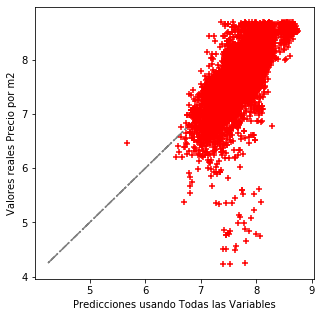

EMC: 0.06629859548182597
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     331.6
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        11:22:31   Log-Likelihood:                -1339.3
No. Observations:               21551   AIC:                             2835.
Df Residuals:                   21473   BIC:                             3457.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
lat    

In [50]:
X = df2[['lat', 'lon','surface_total_in_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Jardin', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito', 'Catalinas',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Congreso', 'Constitución', 'Flores', 'Floresta', 'Las Cañitas',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Chas', 'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal',
       'San Nicolás', 'San Telmo', 'Tribunales', 'Velez Sarsfield',
       'Versalles', 'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store']]

y = df2['price_usd_per_m2']
ylog= np.log(df2['price_usd_per_m2'])
# Tenemos que agregar explícitamente a una constante:

model = sm.OLS(ylog, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.figure(figsize=(5,5))
plt.plot(ylog,ylog, '-.', c='grey')
plt.scatter(predictions, ylog, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando Todas las Variables")
plt.ylabel("Valores reales Precio por m2")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(ylog, predictions))
print (model.summary())


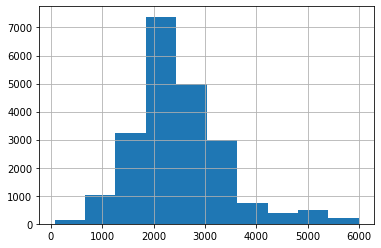

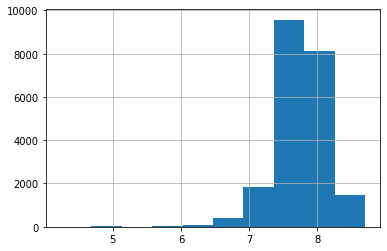

In [56]:
y.hist()
plt.show()
ylog.hist()

# Sacamos las variables que tenian un p-value mayor a 0.05

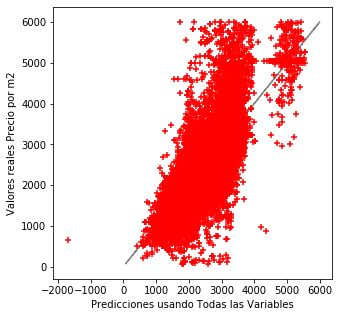

EMC: 316202.7986920823
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     413.5
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        22:09:07   Log-Likelihood:            -1.6701e+05
No. Observations:               21551   AIC:                         3.342e+05
Df Residuals:                   21473   BIC:                         3.348e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
lat      

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store
0,-58.508839,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-58.522982,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-58.516424,112.980392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,-58.443362,45.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,-58.443362,65.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114222,-58.455030,71.907843,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
114223,-58.402519,91.000000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
114227,-58.397372,44.000000,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
114229,-58.442683,157.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
X = df2[['lon','surface_total_in_m2', 'Pileta', 'Parrilla','Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional', 'Almagro','Barrio Norte', 'Belgrano', 'Boca','Caballito',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales', 'Constitución', 'Las Cañitas','Mataderos','Nuñez','Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Nicolás','Tribunales',  'Villa Crespo', 'Villa Devoto', 'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Soldati','Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store']]

y = df2['price_usd_per_m2']

# Tenemos que agregar explícitamente a una constante:

model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)

# Graficamos los resultados
plt.figure(figsize=(5,5))
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando Todas las Variables")
plt.ylabel("Valores reales Precio por m2")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())
X

### Armamos un DF3 únicamente con las variables que nos quedaron 

In [51]:
df3=df2[['lon','surface_total_in_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Almagro','Barrio Norte', 'Belgrano', 'Boca','Caballito',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Las Cañitas','Mataderos','Nuñez',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Nicolás','Tribunales', 'Villa Crespo', 'Villa Devoto',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Soldati','Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store', 'price_usd_per_m2']]
df3


,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa Ortuzar,Villa Pueyrredón,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store,price_usd_per_m2
0,-58.508839,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1127.272727
2,-58.522982,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1309.090909
3,-58.516424,112.980392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1788.431107
7,-58.443362,45.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3066.666667
8,-58.443362,65.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114222,-58.455030,71.907843,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2419.591444
114223,-58.402519,91.000000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1813.186813
114227,-58.397372,44.000000,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3750.000000
114229,-58.442683,157.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2611.464968


### Separamos Train y test

In [52]:
##Otra posibilidad sería >>> y=data.temp >>> x=data.drop('temp',axis=1)

columnas= ['lon','surface_total_in_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Almagro','Barrio Norte', 'Belgrano', 'Boca','Caballito',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Las Cañitas','Mataderos','Nuñez',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Nicolás','Tribunales',
       'Villa Crespo', 'Villa Devoto',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Soldati','Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store']

X=df3[columnas]

y=df3['price_usd_per_m2']

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.30, random_state=1)

type(X)

pandas.core.frame.DataFrame

### Hacemos el fit transform de train y el transform de test

In [53]:
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
Xtrain_norm=sc_X.fit_transform(Xtrain)
Xtest_norm=sc_X.transform(Xtest)


# Comenzamos con la  regresion lineal

#### Hacemos la Regresion Lineal

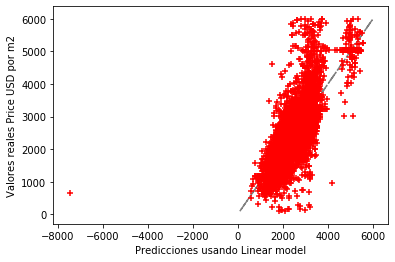

Intercepto=   2480.7929368963037
RM=   [ 7.23196617e+01 -1.17488932e+02  9.14074373e+01 -3.35078447e+01
  8.74478581e+01 -9.07456186e+00  5.39807845e+01  2.32932371e+01
 -2.73551105e+01  8.14472209e+01 -1.08836791e+01 -2.21544045e+01
 -2.28433877e+01  6.32369231e+00 -2.31430958e+01  4.15472134e+01
  1.80922161e+02  2.75775042e+02 -4.20235244e+01  1.09325596e+02
  1.91644570e+01  1.87181568e+01  4.65093863e+01  6.17088504e+01
 -2.39382929e+01  1.02660005e+02 -1.26678254e+01  1.42097272e+02
  3.54750571e+02 -1.60073472e+01  2.00662470e+01 -1.27396135e+01
 -1.84747597e+01  1.37292395e+01 -3.34485761e+01  3.38770710e+02
  2.65212654e+02  7.27866297e+01  5.33108530e+01  1.47803835e+01
  1.00101183e+01  9.00796678e+01  5.02980853e+01 -4.61752140e+01
  2.51291977e+01  2.11106780e+01  1.20915225e+01 -1.75527435e+01
  1.05057165e+02  2.50501645e+01  1.65059788e+14  2.44864670e+14
  1.54660684e+14  1.31079726e+14]
R2_train=   0.594092457572244
R2_test=   0.5898197127898939
MAE: 393.2872475587324

In [54]:
from sklearn import metrics

target=df3['price_usd_per_m2']


X = Xtrain_norm
y = target

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

linearmodel = lm.fit(Xtrain_norm, ytrain)

predictions = lm.predict(Xtest_norm)


# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando Linear model")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

print ('Intercepto=', ' ', linearmodel.intercept_)
print ('RM=', ' ', linearmodel.coef_)
print ('R2_train=', ' ', linearmodel.score(Xtrain_norm, ytrain))
print ('R2_test=', ' ', linearmodel.score(Xtest_norm, ytest))
print ('MAE:', metrics.mean_absolute_error(ytest, predictions))
print ('MSE:', metrics.mean_squared_error(ytest, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))


# Ridge Regression +  CV

In [55]:
# quise hacer el modelo ridge simple para justificar los ajustes en el ridge CV 

rlm = linear_model.Ridge(alpha=0.0001, normalize=True)

ridge_model = rlm.fit(Xtrain_norm, ytrain)
predictions = ridge_model.predict(Xtest_norm)

print ("r^2 train:", ridge_model.score(Xtrain_norm, ytrain))
print('R^2 Test=', ridge_model.score(Xtest_norm, ytest))
print('Coeficientes =', rlm.coef_ )
print('Intercepto=', rlm.intercept_)

r^2 train: 0.5940925662527434
R^2 Test= 0.5898211454348159
Coeficientes = [  72.31043278 -117.42411109   91.39336179  -33.51240096   87.47644016
   -9.01998024   53.93614903   23.30563977  -27.3783364    81.47104895
  -10.85602711  -22.23168951  -22.91200796    6.35294491  -23.09302355
   41.48091793  180.93751055  275.62630544  -41.96134145  109.31192225
   19.17065776   18.66345596   46.47757301   61.67277233  -24.00936751
  102.65172349  -12.81065808  142.15728288  354.65504905  -16.00157955
   20.03308645  -12.75571697  -18.43190257   13.69532517  -33.4386097
  338.72956851  265.1316325    72.68920288   53.30500481   14.72051946
   10.04448816   90.04054358   50.25588207  -46.15672328   25.14496942
   21.09561313   12.11153103  -17.54705189  105.02867125   25.07347643
  -43.32890041   23.37989365  -42.27715252   60.76883663]
Intercepto= 2480.749308972296


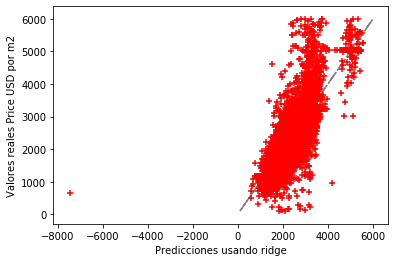

In [56]:
# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando ridge")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

# Ahora probamos con CV

Coeficientes = [  72.13563741 -117.01814302   91.46118672  -33.51309731   87.40451639
   -9.01809415   53.91417008   23.37211763  -27.36924315   81.52531125
  -10.92173432  -22.27724589  -22.90541752    6.3558961   -23.08483473
   41.12252384  180.43031321  274.83357076  -42.0338565   108.73775902
   19.01186541   18.50038162   46.25687173   61.40655698  -24.11143857
  102.39746161  -13.00745517  141.7302577   353.78475149  -16.06877011
   19.90933066  -12.87357392  -18.56353091   13.54638705  -33.48586
  338.1676378   264.46157541   72.45268592   53.01501867   14.57345803
    9.94213688   89.63297473   49.96414601  -46.26334661   24.8915509
   20.98101145   11.957895    -17.56770781  104.54296563   24.83300855
  -43.36672168   23.58783316  -42.47749697   60.66440508]
Intercepto= 2480.749308972296
R^2 Train= 0.5940906272560031
R^2 Test= 0.5898726341934182


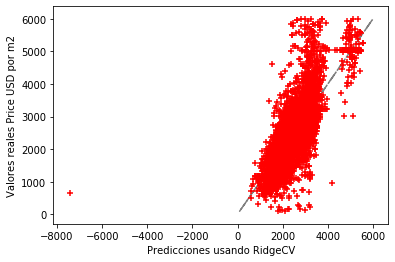

In [57]:
alpha=[1.00000000e-04, 2.50000008e+03, 5.00000005e+03, 7.50000003e+03,
       1.00000000e+04]

rlmcv = linear_model.RidgeCV(alphas=np.logspace(-5,1,10), cv=5, normalize=True)

rlmcv.fit(Xtrain_norm, ytrain)

predictions = rlmcv.predict(Xtest_norm)

print('Coeficientes =', rlmcv.coef_ )
print('Intercepto=', rlmcv.intercept_)
print('R^2 Train=',rlmcv.score(Xtrain_norm, ytrain))
print('R^2 Test=',rlmcv.score(Xtest_norm, ytest))

# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RidgeCV")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

In [58]:
rlmcv.alpha_

0.001

#### Hice unos calculos para estimar alphas y corregir el el ridge CV

np.linspace(0.0001,10000,5)

np.logspace(-5,5,10)

print ("Train r^2:", rlm.score(Xtrain_norm, ytrain))
print ("Test r^2:", rlm.score(Xtest_norm, ytest))

# Lasso


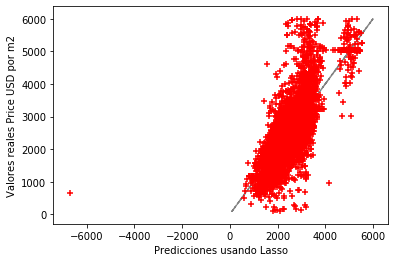

Coeficientes= [  66.48550176 -114.60329684   91.22480835  -31.61201175   86.07547149
   -7.88428644   53.27457995   22.15409845  -26.40399432   80.80181149
  -10.56130311  -21.43672357  -22.1927931     4.88097742  -21.17857218
   37.63379212  177.81876113  269.4266717   -41.16802886  103.77499657
   17.33670207   16.02018775   43.36551893   58.34590647  -23.48113514
  100.30241349  -14.56050342  138.04756048  349.37923029  -15.77518032
   17.8779202   -12.68654791  -18.18628352   10.87377812  -32.82807306
  337.1855818   261.66914677   70.69484495   49.29597268   12.81158354
    8.33146305   85.71220062   45.73265362  -46.68641216   20.83429243
   18.86785804    8.9960092   -16.70165308   99.34321763   21.16470662
  -60.10126692    0.          -59.1980852    45.61369839]
Intercepto= 2480.7493089722966
train r^2: 0.5939146059143748
Test r^2: 0.5919020244352008


In [59]:
lasso = linear_model.Lasso(alpha=0.01, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
lasso_model =lasso.fit(Xtrain_norm, ytrain)
predictions = lasso_model.predict(Xtest_norm)

# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando Lasso")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

print('Coeficientes=',lasso_model.coef_ )
print('Intercepto=', lasso_model.intercept_)
print("train r^2:", lasso_model.score(Xtrain_norm, ytrain))
print("Test r^2:", lasso_model.score(Xtest_norm, ytest))


# Ahora probamos con LassoCV

C:\Users\barbm\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37979397.678403854, tolerance: 1168424.7398893104
  positive)


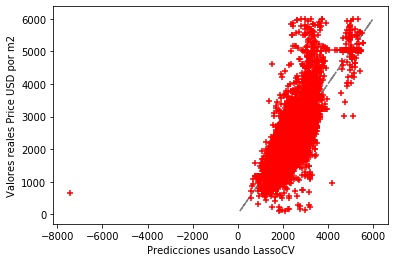

Coeficientes= [  72.25494295 -117.43287613   91.38389797  -33.48794292   87.46656412
   -9.00550321   53.93003103   23.28354194  -27.36685098   81.45653804
  -10.8450513   -22.21632969  -22.90362424    6.33339159  -23.06917019
   41.47069778  180.9531448   275.63371331  -41.94315725  109.30374382
   19.16448586   18.6472764    46.46171249   61.65913351  -23.99136064
  102.64941607  -12.81170397  142.15129291  354.68279936  -15.99132815
   20.01888679  -12.74188498  -18.41434003   13.67524499  -33.42558787
  338.77136263  265.16082851   72.68954477   53.28521057   14.71209143
   10.03366371   90.02955979   50.22964164  -46.15184469   25.1172681
   21.0794856    12.08822843  -17.53382349  105.00880994   25.04950387
  -56.00090133    4.56745854  -54.14997444   50.68820888]
Intercepto= 2480.749308972296
train r^2: 0.5940925562892945
Test r^2: 0.5898455140716592
Alpha= 0.0001291549665014884


In [60]:
lassoCV = linear_model.LassoCV(alphas=np.logspace(-5,5,10), cv=5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
lassoCV_model =lassoCV.fit(Xtrain_norm, ytrain)
predictions = lassoCV_model.predict(Xtest_norm)

# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando LassoCV")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

print ('Coeficientes=',lassoCV_model.coef_ )
print('Intercepto=', lassoCV_model.intercept_)
print ("train r^2:", lassoCV_model.score(Xtrain_norm, ytrain))
print ("Test r^2:", lassoCV_model.score(Xtest_norm, ytest))
print('Alpha=', lassoCV_model.alpha_)

Con Lasso CV obtenemos un r^2 menor que con Lasso sin Cross validation.

# Elastic Net

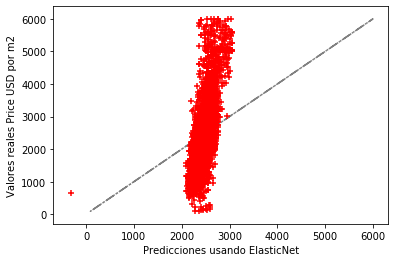

Coeficientes= [ 20.71641877  -6.83433852  26.47138509  -1.73144301  17.78058659
  -1.30448488  19.94069779  15.17590391  -4.15232188  23.28513449
  -7.7693346   -1.85697088  -7.18281741   0.13111944  -3.30712063
  -6.35442373  11.47706921  18.45834905  -9.41228341  -1.85559992
  -2.31509916  -2.53347334   0.3112854    0.51873275  -7.07133618
   8.28273975 -11.91925369   8.24460661  28.46301048  -5.67308987
  -1.18279019  -6.6926296   -7.91060652  -4.09915187  -7.81550503
  37.75213247  19.53270912   3.50576853  -1.73        -2.72268701
  -1.86070838  -1.08522213  -4.00951157 -12.35306219  -5.79778426
  -0.82938974  -4.44768376  -3.34113764   0.4841175   -5.29856577
 -18.48856085  24.71263394 -19.49266485   0.11258681]
Intercepto= 2480.749308972297
train r^2: 0.18255541740775427
Test r^2: 0.18196418492801636


In [61]:
elastic_net = linear_model.ElasticNet(alpha=0.001, normalize=True)

elastic_net.fit(Xtrain_norm, ytrain)
predictions = elastic_net.predict(Xtest_norm)

# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando ElasticNet")
plt.ylabel("Valores reales Price USD por m2")
plt.show()


print ('Coeficientes=',elastic_net.coef_ )
print('Intercepto=', elastic_net.intercept_)
print ("train r^2:", elastic_net.score(Xtrain_norm, ytrain))
print ("Test r^2:", elastic_net.score(Xtest_norm, ytest))

# Elastic Net CV

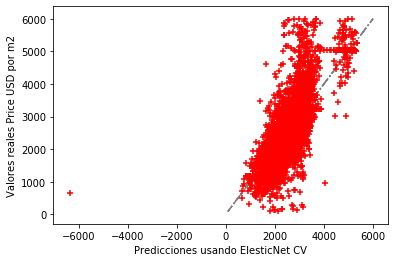

Coeficientes= [ 63.89070973 -91.04370654  94.49051713 -32.9111183   82.19616151
  -8.79068772  52.83346617  27.53268448 -26.23781245  84.32146447
 -15.04840464 -24.49209982 -22.50720875   6.37351506 -22.29191434
  19.15648366 147.34046554 224.35671705 -46.05900951  73.371772
   9.1092937    8.71092845  32.86349413  44.90395229 -30.03112902
  85.87081695 -24.08810398 114.69634265 297.07777879 -19.66987468
  12.29681873 -19.6615139  -26.2276379    4.64726322 -35.83335894
 299.42825688 220.34103778  57.08028974  35.52069285   5.42582559
   3.62929093  64.23339972  32.4734551  -51.71447865  10.04758689
  14.01514144   2.99509777 -18.47556486  75.02404989  10.6228724
 -45.65423765  36.54780553 -54.1206558   53.0686093 ]
Intercepto= 2480.7493089722966
train r^2: 0.5871316631484876
Test r^2: 0.5848058262097158
Alpha= 1e-05


In [62]:
elastic_netCV = linear_model.ElasticNetCV(alphas=np.logspace(-5,5,10),cv=5, normalize=True)

elastic_netCV.fit(Xtrain_norm, ytrain)
predictions = elastic_netCV.predict(Xtest_norm)

# Graficamos los resultados
plt.plot(ytest,ytest, '-.', c='grey')
plt.scatter(predictions, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando ElesticNet CV")
plt.ylabel("Valores reales Price USD por m2")
plt.show()

print ('Coeficientes=',elastic_netCV.coef_ )
print('Intercepto=', elastic_netCV.intercept_)
print ("train r^2:", elastic_netCV.score(Xtrain_norm, ytrain))
print ("Test r^2:", elastic_netCV.score(Xtest_norm, ytest))
print('Alpha=', elastic_netCV.alpha_)

#### Resumen de modelos

In [63]:
print ('Regresion lineal train R2:', ' ', linearmodel.score(Xtrain_norm, ytrain))
print ('Regresion linea test R2:', ' ', linearmodel.score(Xtest_norm, ytest))
print ("Ridge train R2:", ridge_model.score(Xtrain_norm, ytrain))
print ('Ridge test r2: ', ridge_model.score(Xtest_norm, ytest))
print ('RidgeCV R2 Train=',rlmcv.score(Xtrain_norm, ytrain))
print ('RidgeCV R2 Test=',rlmcv.score(Xtest_norm, ytest))
print ("Lasso train r^2:", lasso_model.score(Xtrain_norm, ytrain))
print ("Lasso Test r^2:", lasso_model.score(Xtest_norm, ytest))
print ("LassoCV train r^2:", lassoCV_model.score(Xtrain_norm, ytrain))
print ("LassoCV Test r^2:", lassoCV_model.score(Xtest_norm, ytest))
print ("ElasticNet train r^2:", elastic_net.score(Xtrain_norm, ytrain))
print ("ElasticNet Test r^2:", elastic_net.score(Xtest_norm, ytest))
print ("ElesticNetCV train r^2:", elastic_netCV.score(Xtrain_norm, ytrain))
print ("ElesticNetCV Test r^2:", elastic_netCV.score(Xtest_norm, ytest))

Regresion lineal train R2:   0.594092457572244
Regresion linea test R2:   0.5898197127898939
Ridge train R2: 0.5940925662527434
Ridge test r2:  0.5898211454348159
RidgeCV R2 Train= 0.5940906272560031
RidgeCV R2 Test= 0.5898726341934182
Lasso train r^2: 0.5939146059143748
Lasso Test r^2: 0.5919020244352008
LassoCV train r^2: 0.5940925562892945
LassoCV Test r^2: 0.5898455140716592
ElasticNet train r^2: 0.18255541740775427
ElasticNet Test r^2: 0.18196418492801636
ElesticNetCV train r^2: 0.5871316631484876
ElesticNetCV Test r^2: 0.5848058262097158


###### StatModel R2: 0.597

In [64]:
df2.to_csv('properatticzpitzl.csv', index=False)

### Definiciones y Respuestas

##### 1- Cómo son las performances entre los modelos regularizados y no regularizado?
##### 2- ¿Cuál funciona mejor? 
##### 3- ¿Qué hace una regresión Ridge? 
##### 4- ¿Y una LASSO?
##### 5 - ¿Qué diferencias hay con la regresión lineal sin regularizar?

##### 1. En nuestro caso la mejor performance fue en un modelo no regularizado (statsmodel). Que fue el que primero corrimos . Sacamos los Pvalues mayores 0.05 el R2 empezo a empeorar y no sabemos porque. La normalizacion de los siguientes modelos la corrimos sinlas variables que fuesen mas grandes en su P que 0,05.

##### 2. En nuestro caso el que mejor perform-0 fue el stats models seguido por el Lasso. 
#####    Stats model Train R2 0.596 test R2 0.595 
#####    lasso       Train R2  0.593 test R2  0.591 (es el que menor diferencia tiene entre el test y train)

##### 3.  Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) estén correlacionados entre ellos. Ridge hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. Ridge funciona mejor cuando la mayoría de los atributos son relevantes. Como no se parecen no es el que mejor funciona

##### 4. Lasso nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) sean irrelevantes. Al usar la regularización Lasso, estamos fomentando que la solución sea poco densa. Es decir, favorecemos que algunos de los coeficientes acaben valiendo 0. Esto puede ser útil para descubrir cuáles de los atributos de entrada son relevantes y, en general, para obtener un modelo que generalice mejor. Lasso nos puede ayudar, en este sentido, a hacer la selección de atributos de entrada. Lasso funciona mejor cuando los atributos no están muy correlacionados entre ellos. Y aca solo el traibuto appartment tiende a 0 porque evidentemente la mayoria de los items son departmamentos.



##### 5. De la teoria entendemos que usando la regularizacion, minimizamos la complejidad del modelo a la vez que minimizamos la función de coste. Esto resulta en modelos más simples que tienden a generalizar mejor. Lo modelos que son excesivamente complejos tienden a sobreajustar. Es decir, a encontrar una solución que funciona muy bien para los datos de entrenamiento pero muy mal para datos nuevos.  Nos interesan los modelos que además de aprender bien, también funcionen tengan un buen rendimiento con datos nuevos. Sin embargo en nuestro caso no vemos este efecto ya que el que ajusta mejor es el que esta sin regularizar.

## Protafolio de departamentos - subvaluacion y sobrevaluacion

#### creamos con una muestra nuestro portfolio de 100 propiedades

In [65]:
df4=  df3.sample(frac=1, random_state=10).head(100)

In [66]:
df4

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa Ortuzar,Villa Pueyrredón,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store,price_usd_per_m2
110246,-58.448211,45.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2400.000000
18122,-58.362056,190.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,4205.263158
62684,-58.437251,223.000000,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,2914.798206
76592,-58.480617,179.000000,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,2290.502793
79697,-58.463837,71.000000,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,2323.943662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104319,-58.477273,39.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1871.794872
23919,-58.477891,56.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000.000000
10890,-58.460655,73.581081,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,2011.874251
103724,-58.461006,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1700.000000


In [67]:
y.shape

(21551,)

In [68]:
columnas= ['lon','surface_total_in_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Almagro','Barrio Norte', 'Belgrano', 'Boca','Caballito',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Las Cañitas','Mataderos','Nuñez',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Nicolás','Tribunales',        'Villa Crespo', 'Villa Devoto',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Soldati','Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store']

X1=df4[columnas]

y1=df4['price_usd_per_m2']

In [69]:
X1.shape,y1

((100, 54), 110246    2400.000000
 18122     4205.263158
 62684     2914.798206
 76592     2290.502793
 79697     2323.943662
              ...     
 104319    1871.794872
 23919     2000.000000
 10890     2011.874251
 103724    1700.000000
 33924     2126.534206
 Name: price_usd_per_m2, Length: 100, dtype: float64)

### Hacemos la prediccion con el modelo Statmodel

In [70]:
ypred = model1.predict(X1)
print(ypred)

110246    2357.812944
18122     4381.774141
62684     2946.646659
76592     2688.764735
79697     2158.585593
             ...     
104319    1537.420937
23919     2446.980292
10890     2154.007598
103724    2057.351200
33924     2102.155690
Length: 100, dtype: float64


#### Creamos una columna en el data frame con una prediccion del valor por m2 y otra de valoracion que es % precio sobre prediccion

In [71]:
df4['prediccion']=ypred

In [72]:
df4['valoracion']=df4['prediccion']/df4['price_usd_per_m2']
df4

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion
110246,-58.448211,45.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2400.000000,2357.812944,0.982422
18122,-58.362056,190.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,4205.263158,4381.774141,1.041974
62684,-58.437251,223.000000,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,2914.798206,2946.646659,1.010926
76592,-58.480617,179.000000,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,2290.502793,2688.764735,1.173875
79697,-58.463837,71.000000,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,2323.943662,2158.585593,0.928846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104319,-58.477273,39.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1871.794872,1537.420937,0.821362
23919,-58.477891,56.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,2000.000000,2446.980292,1.223490
10890,-58.460655,73.581081,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,2011.874251,2154.007598,1.070647
103724,-58.461006,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1700.000000,2057.351200,1.210207


#### Creamos columna con un booleano para las propiedades subvaluadad y sobrevaluadas

In [73]:
df4['subvaluados']=df4['valoracion']>1
df4['sobrevaluados']=df4['valoracion']<1

df4['subvaluados'].describe()

count      100
unique       2
top       True
freq        52
Name: subvaluados, dtype: object

In [74]:
df4['sobrevaluados'].describe()

count       100
unique        2
top       False
freq         52
Name: sobrevaluados, dtype: object

In [75]:
pd.set_option('display.max_rows', None)
df4

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados
110246,-58.448211,45.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2400.000000,2357.812944,0.982422,False,True
18122,-58.362056,190.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,4205.263158,4381.774141,1.041974,True,False
62684,-58.437251,223.000000,0,0,1,0,0,0,1,1,...,0,0,1,0,0,2914.798206,2946.646659,1.010926,True,False
76592,-58.480617,179.000000,1,1,1,0,1,1,0,0,...,0,0,1,0,0,2290.502793,2688.764735,1.173875,True,False
79697,-58.463837,71.000000,0,0,1,0,0,0,1,1,...,0,0,1,0,0,2323.943662,2158.585593,0.928846,False,True
47533,-58.505245,114.000000,0,0,1,0,0,0,1,1,...,0,0,1,0,0,3070.175439,2278.957684,0.742289,False,True
105432,-58.420176,78.000000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1692.307692,1409.940253,0.833147,False,True
36132,-58.433751,108.721739,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3263.157895,3208.060703,0.983115,False,True
19725,-58.429941,102.000000,0,0,1,0,0,0,1,0,...,0,0,1,0,0,2843.137255,2340.354726,0.823159,False,True
14903,-58.438744,52.000000,1,1,1,0,0,0,0,0,...,0,0,1,0,0,2980.769231,3387.097881,1.136317,True,False


In [76]:
pd.reset_option("^display")

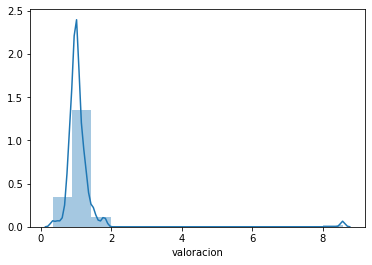

In [77]:
sns.distplot(df4['valoracion'], bins=15)

### Hacemos un data frame nuevo para aplicar algunos calculos y hacer la seleccion de las mejores propiedades a comprar

In [78]:
df5=df3

In [79]:
columnas= ['lon','surface_total_in_m2', 'Pileta', 'Parrilla',
       'Cochera', 'SUM', 'Gimnasio', 'Laundry', 'Lavadero', 'Suite',
       'Cuotas', 'Pozo', 'A_Reciclar', 'Reciclado', 'Apto_Profesional',
       'Almagro','Barrio Norte', 'Belgrano', 'Boca','Caballito',
       'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Las Cañitas','Mataderos','Nuñez',
       'Palermo', 'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Nicolás','Tribunales',        'Villa Crespo', 'Villa Devoto',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Soldati','Villa Urquiza', 'Villa del Parque', 'PH', 'apartment', 'house',
       'store']

X2=df5[columnas]

y2=df5['price_usd_per_m2']

In [80]:
#Aplicamos la prediccion
ypred = model1.predict(X2)
print(ypred)

0         1406.177618
2         1662.177488
3         1601.582779
7         3202.690267
8         3171.089712
             ...     
114222    2312.913356
114223    2716.234585
114227    3208.889009
114229    2701.629634
114277    2553.412384
Length: 21551, dtype: float64


In [81]:
df5['prediccion']=ypred

C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df5['valoracion']=df5['prediccion']/df5['price_usd_per_m2']
df5

C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion
0,-58.508839,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1127.272727,1406.177618,1.247416
2,-58.522982,55.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1309.090909,1662.177488,1.269719
3,-58.516424,112.980392,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1788.431107,1601.582779,0.895524
7,-58.443362,45.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3066.666667,3202.690267,1.044356
8,-58.443362,65.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3000.000000,3171.089712,1.057030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114222,-58.455030,71.907843,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2419.591444,2312.913356,0.955911
114223,-58.402519,91.000000,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1813.186813,2716.234585,1.498045
114227,-58.397372,44.000000,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3750.000000,3208.889009,0.855704
114229,-58.442683,157.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2611.464968,2701.629634,1.034526


In [83]:
df5['subvaluados']=df5['valoracion']>1
df5['sobrevaluados']=df5['valoracion']<1
df5

C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados
0,-58.508839,55.000000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1127.272727,1406.177618,1.247416,True,False
2,-58.522982,55.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1309.090909,1662.177488,1.269719,True,False
3,-58.516424,112.980392,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1788.431107,1601.582779,0.895524,False,True
7,-58.443362,45.000000,1,0,0,0,0,1,0,0,...,0,0,1,0,0,3066.666667,3202.690267,1.044356,True,False
8,-58.443362,65.000000,1,0,0,0,0,1,0,0,...,0,0,1,0,0,3000.000000,3171.089712,1.057030,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114222,-58.455030,71.907843,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2419.591444,2312.913356,0.955911,False,True
114223,-58.402519,91.000000,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1813.186813,2716.234585,1.498045,True,False
114227,-58.397372,44.000000,0,1,0,0,0,1,0,0,...,0,0,1,0,0,3750.000000,3208.889009,0.855704,False,True
114229,-58.442683,157.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,2611.464968,2701.629634,1.034526,True,False


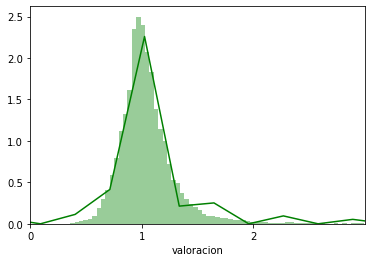

In [84]:
ax=sns.distplot(df5['valoracion'], color='g', bins=1000)
ax.set_xlim(0,3)
ax.set_xticks(range(0,3))
plt.show()

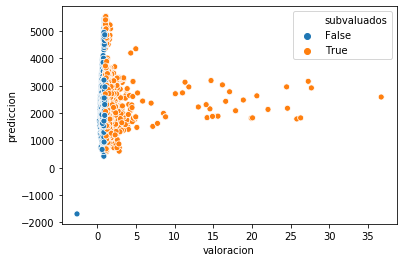

In [85]:
sns.scatterplot(x=df5['valoracion'], y=df5['prediccion'], hue=df5['subvaluados'])
plt.show()

In [86]:
df6=df5.sort_values(by='valoracion', axis=0, ascending=False, inplace=False, kind='quicksort',na_position='last')
df6.head(50)

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados
107830,-58.422611,78.000000,1,1,1,0,1,0,0,0,...,0,0,1,0,0,70.512821,2588.331175,36.707242,True,False
100362,-58.432927,270.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,105.555556,2921.452022,27.676914,True,False
102320,-58.373161,44.000000,0,1,0,0,0,1,0,0,...,0,0,1,0,0,115.991136,3163.301306,27.271923,True,False
53043,-58.461474,97.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,69.381856,1824.112582,26.290917,True,False
17907,-58.480911,81.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,69.239012,1785.753864,25.791152,True,False
5084,-58.442414,183.000000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,88.569290,2177.594985,24.586344,True,False
49079,-58.400029,45.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,120.891333,2958.885472,24.475580,True,False
60660,-58.460145,58.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,96.695862,2134.044883,22.069661,True,False
19289,-58.442670,40.000000,0,1,1,0,0,1,0,0,...,0,0,1,0,0,127.590250,2631.693059,20.626130,True,False
84027,-58.487051,246.000000,0,1,0,0,0,0,0,0,...,1,0,0,0,1,90.964959,1825.350536,20.066524,True,False


### valor predicho de mercado de nuestro portafolio

In [87]:
df4['valor_mercado']=df4['prediccion']*df4['surface_total_in_m2']
df4

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado
110246,-58.448211,45.000000,0,0,0,0,0,0,0,0,...,0,1,0,0,2400.000000,2357.812944,0.982422,False,True,106101.582479
18122,-58.362056,190.000000,0,0,0,0,0,0,1,0,...,0,1,0,0,4205.263158,4381.774141,1.041974,True,False,832537.086797
62684,-58.437251,223.000000,0,0,1,0,0,0,1,1,...,0,1,0,0,2914.798206,2946.646659,1.010926,True,False,657102.205011
76592,-58.480617,179.000000,1,1,1,0,1,1,0,0,...,0,1,0,0,2290.502793,2688.764735,1.173875,True,False,481288.887561
79697,-58.463837,71.000000,0,0,1,0,0,0,1,1,...,0,1,0,0,2323.943662,2158.585593,0.928846,False,True,153259.577077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104319,-58.477273,39.000000,0,1,0,0,0,0,0,0,...,0,1,0,0,1871.794872,1537.420937,0.821362,False,True,59959.416539
23919,-58.477891,56.000000,0,0,1,0,0,0,0,0,...,0,1,0,0,2000.000000,2446.980292,1.223490,True,False,137030.896373
10890,-58.460655,73.581081,0,0,0,0,1,1,0,0,...,0,1,0,0,2011.874251,2154.007598,1.070647,True,False,158494.207723
103724,-58.461006,50.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,1700.000000,2057.351200,1.210207,True,False,102867.560001


#### Este es el valor que tenemos para invertir de nuestra muestra

In [88]:
capital=df4['valor_mercado'].sum()
capital

24264016.98584553

### Empezamos a analizar las posibles compras del portafolio total

In [89]:
posibles_compras=df6.sort_values(by='valoracion', axis=0, ascending=True, inplace=False, kind='quicksort',na_position='last')
posibles_compras.head(50)

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,Villa del Parque,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados
26801,-63.616672,70.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,642.857143,-1690.836065,-2.630189,False,True
56802,-58.383916,384.000000,0,0,0,0,0,0,0,1,...,0,0,1,0,0,5989.583333,1724.864644,0.287977,False,True
23983,-58.487144,240.000000,0,1,0,0,0,0,1,1,...,0,0,1,0,0,4608.333333,1538.376171,0.333825,False,True
31145,-58.403675,216.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,5555.555556,1921.907348,0.345943,False,True
77301,-58.378363,500.000000,1,0,1,0,0,0,0,0,...,0,0,1,0,0,4600.000000,1655.981934,0.359996,False,True
46865,-58.402520,60.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,6000.000000,2169.159103,0.361527,False,True
61226,-58.455716,500.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,5833.284720,2130.312566,0.365199,False,True
61223,-58.455716,500.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,5833.284720,2130.312566,0.365199,False,True
4409,-58.377341,105.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,3333.333333,1275.986422,0.382796,False,True
58172,-58.413322,141.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4609.929078,1858.390329,0.403128,False,True


In [90]:
# calulamos el valor de mercado de acuerdo al valor predicho
posibles_compras['valor_mercado']=posibles_compras['prediccion']*posibles_compras['surface_total_in_m2']
posibles_compras

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado
26801,-63.616672,70.0,0,0,0,0,0,0,0,0,...,0,1,0,0,642.857143,-1690.836065,-2.630189,False,True,-118358.524526
56802,-58.383916,384.0,0,0,0,0,0,0,0,1,...,0,1,0,0,5989.583333,1724.864644,0.287977,False,True,662348.023416
23983,-58.487144,240.0,0,1,0,0,0,0,1,1,...,0,1,0,0,4608.333333,1538.376171,0.333825,False,True,369210.281008
31145,-58.403675,216.0,0,0,0,0,0,0,0,0,...,0,0,0,1,5555.555556,1921.907348,0.345943,False,True,415131.987214
77301,-58.378363,500.0,1,0,1,0,0,0,0,0,...,0,1,0,0,4600.000000,1655.981934,0.359996,False,True,827990.967172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-58.480911,81.0,0,0,0,0,0,0,1,0,...,0,1,0,0,69.239012,1785.753864,25.791152,True,False,144646.062992
53043,-58.461474,97.0,0,0,0,0,0,0,1,0,...,0,1,0,0,69.381856,1824.112582,26.290917,True,False,176938.920472
102320,-58.373161,44.0,0,1,0,0,0,1,0,0,...,0,1,0,0,115.991136,3163.301306,27.271923,True,False,139185.257444
100362,-58.432927,270.0,0,1,0,0,0,0,0,0,...,0,0,0,1,105.555556,2921.452022,27.676914,True,False,788792.046041


In [91]:
#eliminamos el primer dato porque nos daba una prediccion negativa
posibles_compras=posibles_compras.iloc[1:,:]
posibles_compras

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,PH,apartment,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado
56802,-58.383916,384.0,0,0,0,0,0,0,0,1,...,0,1,0,0,5989.583333,1724.864644,0.287977,False,True,662348.023416
23983,-58.487144,240.0,0,1,0,0,0,0,1,1,...,0,1,0,0,4608.333333,1538.376171,0.333825,False,True,369210.281008
31145,-58.403675,216.0,0,0,0,0,0,0,0,0,...,0,0,0,1,5555.555556,1921.907348,0.345943,False,True,415131.987214
77301,-58.378363,500.0,1,0,1,0,0,0,0,0,...,0,1,0,0,4600.000000,1655.981934,0.359996,False,True,827990.967172
46865,-58.402520,60.0,0,0,0,0,0,0,0,0,...,0,0,0,1,6000.000000,2169.159103,0.361527,False,True,130149.546188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-58.480911,81.0,0,0,0,0,0,0,1,0,...,0,1,0,0,69.239012,1785.753864,25.791152,True,False,144646.062992
53043,-58.461474,97.0,0,0,0,0,0,0,1,0,...,0,1,0,0,69.381856,1824.112582,26.290917,True,False,176938.920472
102320,-58.373161,44.0,0,1,0,0,0,1,0,0,...,0,1,0,0,115.991136,3163.301306,27.271923,True,False,139185.257444
100362,-58.432927,270.0,0,1,0,0,0,0,0,0,...,0,0,0,1,105.555556,2921.452022,27.676914,True,False,788792.046041


In [92]:
#calculamos el valorrealde compra de estas propiedades
posibles_compras['valorreal']=posibles_compras['price_usd_per_m2']*posibles_compras['surface_total_in_m2']

C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
#Calculamos la diferencia absoluta para estimar despues cual seria la ganancia
posibles_compras['diferencia_absoluta']=posibles_compras['valorreal']-posibles_compras['valor_mercado']
posibles_compras

C:\Users\barbm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado,valorreal,diferencia_absoluta
56802,-58.383916,384.0,0,0,0,0,0,0,0,1,...,0,0,5989.583333,1724.864644,0.287977,False,True,662348.023416,2300000.00,1.637652e+06
23983,-58.487144,240.0,0,1,0,0,0,0,1,1,...,0,0,4608.333333,1538.376171,0.333825,False,True,369210.281008,1106000.00,7.367897e+05
31145,-58.403675,216.0,0,0,0,0,0,0,0,0,...,0,1,5555.555556,1921.907348,0.345943,False,True,415131.987214,1200000.00,7.848680e+05
77301,-58.378363,500.0,1,0,1,0,0,0,0,0,...,0,0,4600.000000,1655.981934,0.359996,False,True,827990.967172,2300000.00,1.472009e+06
46865,-58.402520,60.0,0,0,0,0,0,0,0,0,...,0,1,6000.000000,2169.159103,0.361527,False,True,130149.546188,360000.00,2.298505e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-58.480911,81.0,0,0,0,0,0,0,1,0,...,0,0,69.239012,1785.753864,25.791152,True,False,144646.062992,5608.36,-1.390377e+05
53043,-58.461474,97.0,0,0,0,0,0,0,1,0,...,0,0,69.381856,1824.112582,26.290917,True,False,176938.920472,6730.04,-1.702089e+05
102320,-58.373161,44.0,0,1,0,0,0,1,0,0,...,0,0,115.991136,3163.301306,27.271923,True,False,139185.257444,5103.61,-1.340816e+05
100362,-58.432927,270.0,0,1,0,0,0,0,0,0,...,0,1,105.555556,2921.452022,27.676914,True,False,788792.046041,28500.00,-7.602920e+05


In [94]:
## Las ordenamos de acuerdo a esas diferencias absolutas para selccionar las que mas ganancias nos dejen
posibles_compras=posibles_compras.sort_values(by='diferencia_absoluta', axis=0, ascending=False, inplace=False, kind='quicksort',na_position='last')
posibles_compras.head(10)

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado,valorreal,diferencia_absoluta
61226,-58.455716,500.0,0,0,0,0,0,0,0,0,...,0,0,5833.284720,2130.312566,0.365199,False,True,1.065156e+06,2916642.36,1.851486e+06
61223,-58.455716,500.0,0,0,0,0,0,0,0,0,...,0,0,5833.284720,2130.312566,0.365199,False,True,1.065156e+06,2916642.36,1.851486e+06
61227,-58.455716,500.0,0,0,0,0,0,0,0,0,...,0,1,5833.284720,2364.785692,0.405395,False,True,1.182393e+06,2916642.36,1.734250e+06
61224,-58.455716,500.0,0,0,0,0,0,0,0,0,...,0,1,5833.284720,2364.785692,0.405395,False,True,1.182393e+06,2916642.36,1.734250e+06
56802,-58.383916,384.0,0,0,0,0,0,0,0,1,...,0,0,5989.583333,1724.864644,0.287977,False,True,6.623480e+05,2300000.00,1.637652e+06
77301,-58.378363,500.0,1,0,1,0,0,0,0,0,...,0,0,4600.000000,1655.981934,0.359996,False,True,8.279910e+05,2300000.00,1.472009e+06
54923,-58.400972,450.0,0,0,1,0,1,0,1,0,...,1,0,5555.555556,2556.075341,0.460094,False,True,1.150234e+06,2500000.00,1.349766e+06
17421,-58.402332,455.0,1,0,1,0,0,0,0,1,...,0,0,5934.065934,3107.173675,0.523616,False,True,1.413764e+06,2700000.00,1.286236e+06
53334,-58.439573,430.0,1,1,1,0,0,1,0,1,...,0,0,5790.697674,2876.340224,0.496717,False,True,1.236826e+06,2490000.00,1.253174e+06
30961,-58.397364,400.0,0,0,1,0,0,0,0,1,...,1,0,5500.000000,2379.191773,0.432580,False,True,9.516767e+05,2200000.00,1.248323e+06


##### dropeamos las propiedades mayore a 150m2 por baja rotacion en tiempo entre la compra y venta

In [95]:
posibles_compras = posibles_compras.drop(posibles_compras[posibles_compras['surface_total_in_m2']>=150].index)
posibles_compras

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,house,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado,valorreal,diferencia_absoluta
10829,-58.443019,145.000000,0,0,0,0,0,0,0,0,...,0,1,5862.068966,2484.662477,0.423854,False,True,360276.059208,850000.000000,489723.940792
39174,-58.439367,147.578947,0,0,1,0,0,0,0,0,...,0,1,5960.000000,2651.423977,0.444870,False,True,391294.359546,879570.526316,488276.166770
39188,-58.437267,147.578947,0,0,1,0,0,0,0,0,...,0,1,5960.000000,2652.818385,0.445104,False,True,391500.144747,879570.526316,488070.381569
4911,-58.436244,147.578947,0,0,0,0,0,0,0,0,...,0,1,5769.230769,2485.088177,0.430749,False,True,366746.697243,851417.004049,484670.306806
58172,-58.413322,141.000000,0,0,0,0,0,0,0,0,...,0,1,4609.929078,1858.390329,0.403128,False,True,262033.036335,650000.000000,387966.963665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69459,-58.378651,139.000000,0,0,0,0,0,0,0,0,...,0,1,971.223022,2877.534978,2.962795,True,False,399977.361907,135000.000000,-264977.361907
46,-58.362056,80.000000,0,0,0,0,0,0,0,0,...,1,0,875.000000,4353.847448,4.975826,True,False,348307.795848,70000.000000,-278307.795848
107186,-58.423297,149.303030,0,0,0,0,0,0,0,0,...,0,1,684.210526,3151.134472,4.605504,True,False,470473.925577,102154.704944,-368319.220632
107305,-58.414330,149.303030,0,0,0,0,0,0,0,0,...,0,1,684.210526,3157.090161,4.614209,True,False,471363.128012,102154.704944,-369208.423068


In [96]:
#hacemos una suma acumulativa para determinar en orden hasta que propiedades podriamos comprar
posibles_compras['sumaacumulativa'] = posibles_compras['valorreal'].cumsum()
posibles_compras.head(50)

,lon,surface_total_in_m2,Pileta,Parrilla,Cochera,SUM,Gimnasio,Laundry,Lavadero,Suite,...,store,price_usd_per_m2,prediccion,valoracion,subvaluados,sobrevaluados,valor_mercado,valorreal,diferencia_absoluta,sumaacumulativa
10829,-58.443019,145.000000,0,0,0,0,0,0,0,0,...,1,5862.068966,2484.662477,0.423854,False,True,360276.059208,850000.000000,489723.940792,8.500000e+05
39174,-58.439367,147.578947,0,0,1,0,0,0,0,0,...,1,5960.000000,2651.423977,0.444870,False,True,391294.359546,879570.526316,488276.166770,1.729571e+06
39188,-58.437267,147.578947,0,0,1,0,0,0,0,0,...,1,5960.000000,2652.818385,0.445104,False,True,391500.144747,879570.526316,488070.381569,2.609141e+06
4911,-58.436244,147.578947,0,0,0,0,0,0,0,0,...,1,5769.230769,2485.088177,0.430749,False,True,366746.697243,851417.004049,484670.306806,3.460558e+06
58172,-58.413322,141.000000,0,0,0,0,0,0,0,0,...,1,4609.929078,1858.390329,0.403128,False,True,262033.036335,650000.000000,387966.963665,4.110558e+06
49479,-58.400217,141.000000,0,0,0,0,0,0,0,0,...,1,4609.929078,1908.021269,0.413894,False,True,269030.998997,650000.000000,380969.001003,4.760558e+06
20970,-58.439871,145.281250,0,0,0,0,0,0,0,0,...,1,5500.000000,2969.441529,0.539898,False,True,431404.177125,799046.875000,367642.697875,5.559605e+06
74591,-58.434860,113.000000,0,0,0,0,0,0,0,0,...,1,5752.212389,2540.642584,0.441681,False,True,287092.612021,650000.000000,362907.387979,6.209605e+06
71017,-58.415915,141.000000,0,0,0,0,0,0,0,0,...,0,5531.914894,2975.609656,0.537899,False,True,419560.961454,780000.000000,360439.038546,6.989605e+06
95816,-58.423479,145.000000,1,1,1,0,0,1,0,0,...,0,5855.172414,3370.761145,0.575689,False,True,488760.366011,849000.000000,360239.633989,7.838605e+06


#### En este listado apareceran las propiedades a comprar de acuerdo a este valor

In [97]:
portafolio_compraventa = posibles_compras.drop(posibles_compras[posibles_compras['sumaacumulativa']>=capital].index)
portafolio_compraventa
portafolio_compraventa.shape

(33, 63)

Esta es la dferencia que esperamos obtener de la venta de estas propiedades a valor estimado real

In [98]:
portafolio_compraventa['diferencia_absoluta'].sum()

11084760.78740459

In [99]:
portafolio_compraventa.index

Int64Index([ 10829,  39174,  39188,   4911,  58172,  49479,  20970,  74591,
             71017,  95816,  96271,  56151,  45974,  42494,  84886,  27723,
             19434,  57579,  49549,  50786,  10236,  54424,  54431, 105068,
             57260,  15652,  51934,  49466,  66681,  29457,  33300,  25851,
             49471],
           dtype='int64')

###  Como hacer que el eje X sea el index de las propiedadaes
###### index=[10829,39174,39188,4911,58172,49479,20970,74591,71017,95816,
###### 96271,56151,45974,42494,84886,27723,19434,57579,49549,50786,10236,54424,
###### 54431,105068,57260,15652,51934,49466,66681,29457,33300,25851]

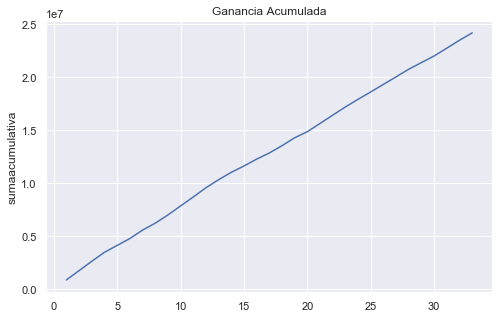

In [100]:
sns.set(rc={'figure.figsize':(8,5)})

num_de_propiedades=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

ingresos_por_venta=portafolio_compraventa['sumaacumulativa']

sns.lineplot(x=num_de_propiedades,y=ingresos_por_venta)

plt.title('Ganancia Acumulada')

plt.show()

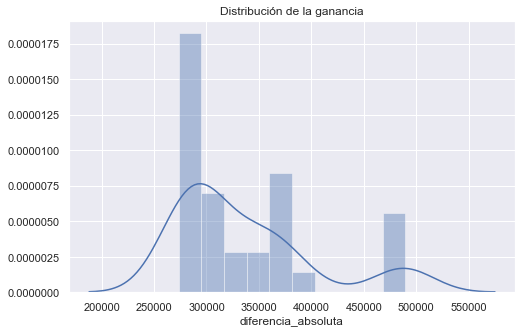

In [101]:
sns.distplot(portafolio_compraventa['diferencia_absoluta'],bins=10)
plt.title('Distribución de la ganancia')
plt.show()

Text(0.5, 1.0, 'Ganancia por propiedad')

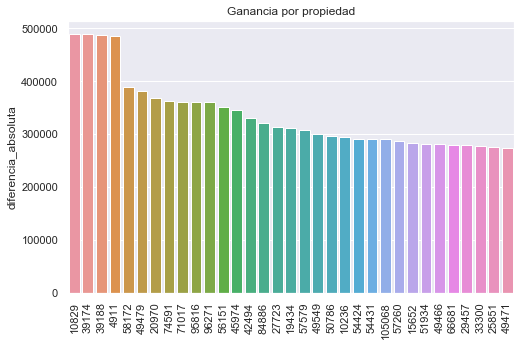

In [102]:
g = sns.barplot(x=num_de_propiedades,y=portafolio_compraventa['diferencia_absoluta'])
g.set_xticks(range(len(portafolio_compraventa[['diferencia_absoluta']]))) # <--- set the ticks first
g.set_xticklabels([10829,  39174,  39188,   4911,  58172,  49479,  20970,  74591,
             71017,  95816,  96271,  56151,  45974,  42494,  84886,  27723,
             19434,  57579,  49549,  50786,  10236,  54424,  54431, 105068,
             57260,  15652,  51934,  49466,  66681,  29457,  33300,  25851,
             49471])
plt.xticks(rotation=90)
plt.title('Ganancia por propiedad')

Mapa de propiedades seleccionadas para adquirir

In [103]:
mapapropcomp=df.loc[[10829,  39174,  39188,   4911,  58172,  49479,  20970,  74591,
             71017,  95816,  96271,  56151,  45974,  42494,  84886,  27723,
             19434,  57579,  49549,  50786,  10236,  54424,  54431, 105068,
             57260,  15652,  51934,  49466,  66681,  29457,  33300,  25851,
             49471]]
mapapropcomp

,property_type,place_name,country_name,Provincia,geonames_id,lat-lon,lat,lon,price,currency,...,Gimnasio,Laundry,Lavadero,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional
10829,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5976786,-58.4430195",-34.597679,-58.443019,850000.0,USD,...,0,0,0,0,0,0,0,0,0,1
39174,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5972427,-58.4393667",-34.597243,-58.439367,149000.0,USD,...,0,0,0,0,0,0,0,0,0,1
39188,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5994772,-58.4372673",-34.599477,-58.437267,149000.0,USD,...,0,0,0,0,0,0,0,0,0,1
4911,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5969997,-58.4362436",-34.597000,-58.436244,150000.0,USD,...,0,0,0,0,0,0,0,0,0,1
58172,store,Parque Patricios,Argentina,Capital Federal,3430114.0,"-34.6383848209,-58.4133220924",-34.638385,-58.413322,650000.0,USD,...,0,0,0,0,0,0,0,0,0,1
49479,store,Parque Patricios,Argentina,Capital Federal,3430114.0,"-34.637701,-58.4002165",-34.637701,-58.400217,650000.0,USD,...,0,0,0,0,0,0,0,0,0,0
20970,store,Belgrano,Argentina,Capital Federal,3436077.0,"-34.5630358,-58.439871",-34.563036,-58.439871,110000.0,USD,...,0,0,0,0,0,0,0,0,0,1
74591,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5930686966,-58.434860402",-34.593069,-58.434860,650000.0,USD,...,0,0,0,0,0,0,0,0,0,1
71017,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5852861631,-58.4159147176",-34.585286,-58.415915,780000.0,USD,...,0,0,0,0,0,0,0,0,0,0
95816,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5768892189,-58.4234788852",-34.576889,-58.423479,849000.0,USD,...,0,1,0,0,0,0,0,0,0,0


#### Ubicaremos en el mapa las propiedades seleccionadas

In [104]:
df1_geonames = mapapropcomp[['geonames_id','lat','lon','lat-lon']]
df1_geonames

,geonames_id,lat,lon,lat-lon
10829,3427458.0,-34.597679,-58.443019,"-34.5976786,-58.4430195"
39174,3427458.0,-34.597243,-58.439367,"-34.5972427,-58.4393667"
39188,3427458.0,-34.599477,-58.437267,"-34.5994772,-58.4372673"
4911,3427458.0,-34.597000,-58.436244,"-34.5969997,-58.4362436"
58172,3430114.0,-34.638385,-58.413322,"-34.6383848209,-58.4133220924"
49479,3430114.0,-34.637701,-58.400217,"-34.637701,-58.4002165"
20970,3436077.0,-34.563036,-58.439871,"-34.5630358,-58.439871"
74591,3427458.0,-34.593069,-58.434860,"-34.5930686966,-58.434860402"
71017,3430234.0,-34.585286,-58.415915,"-34.5852861631,-58.4159147176"
95816,3430234.0,-34.576889,-58.423479,"-34.5768892189,-58.4234788852"


In [105]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import fiona
import rtree
import folium

# Setteo el tamaño default de los plots
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 20)

pd.options.display.max_rows = 10

In [106]:
from shapely.geometry import Point

In [107]:
# Hago un Geodata frame para poder levantarlo
def from_lon_lat(df, lon, lat):
    gdf = gpd.GeoDataFrame(df.drop([lon, lat], axis=1),
                                 crs={'init': 'epsg:4326'},
                                 geometry=[Point(lonlat) for lonlat in zip(df[lon], df[lat])])
    return gdf

In [108]:
df2_geonames = from_lon_lat(df1_geonames, "lon", "lat");

In [109]:
df2_geonames.head(5)

,geonames_id,lat-lon,geometry
10829,3427458.0,"-34.5976786,-58.4430195",POINT (-58.44302 -34.59768)
39174,3427458.0,"-34.5972427,-58.4393667",POINT (-58.43937 -34.59724)
39188,3427458.0,"-34.5994772,-58.4372673",POINT (-58.43727 -34.59948)
4911,3427458.0,"-34.5969997,-58.4362436",POINT (-58.43624 -34.59700)
58172,3430114.0,"-34.6383848209,-58.4133220924",POINT (-58.41332 -34.63838)


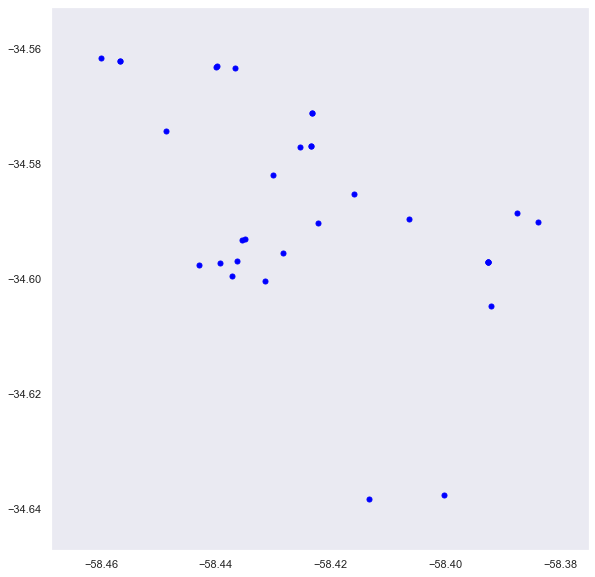

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
df2_geonames.plot(ax=ax, marker='o', color='blue', markersize=25)
plt.grid()
plt.show();

In [111]:
caba = pd.read_csv('barrios.csv')

In [112]:
caba

,WKT,barrio,comuna,perimetro,area
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15,7724.852955,3.115707e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15,8131.857075,3.615978e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5,8537.901368,4.050752e+06
...,...,...,...,...,...
43,"POLYGON ((-58.4505669109009 -34.5356104340406,...",BELGRANO,13,20609.775397,7.999240e+06
44,"POLYGON ((-58.3800038855693 -34.5700235247202,...",RECOLETA,2,21452.838648,6.317265e+06
45,"POLYGON ((-58.3742728981345 -34.5787043103248,...",RETIRO,1,18837.988687,4.512711e+06
46,"POLYGON ((-58.4587157782967 -34.5372101050856,...",NUÑEZ,13,10785.261081,4.424199e+06


In [113]:
import shapely.wkt
def from_wkt(df, wkt_column):
    #import shapely.wkt
    df["WKT"] = df[wkt_column].apply(shapely.wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry='WKT')
    return gdf

In [114]:
caba = from_wkt(caba, "WKT")

In [115]:
type(caba)

geopandas.geodataframe.GeoDataFrame

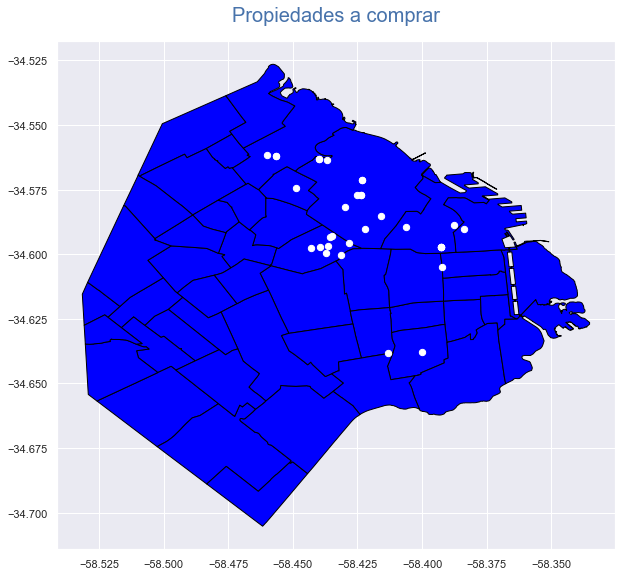

In [116]:
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title('Propiedades a comprar', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
caba.plot(ax=ax, color='blue', edgecolor='black', legend=True)
df2_geonames.plot(ax=ax, marker='o', color='white', markersize=40)
fig.set_size_inches(10,10)
plt.show()

In [119]:
import folium


In [120]:
mapaba1 = folium.Map(location=[-34.60376, -58.3816])

for index,row in df1_geonames.iterrows():
    lat = row['lat']
    lon = row['lon']
    newMarker = folium.Marker([lat,lon])
    newMarker.add_to(mapaba1)

mapaba1

#### Estadisticas de nuestras inversiones

In [122]:
mapapropcomp.shape

(33, 39)

In [123]:
mapapropcomp.append(portafolio_compraventa['valor_mercado'])
mapapropcomp.shape

(33, 39)

In [124]:
portestat=df.loc[[10829,  39174,  39188,   4911,  58172,  49479,  20970,  74591,
             71017,  95816,  96271,  56151,  45974,  42494,  84886,  27723,
             19434,  57579,  49549,  50786,  10236,  54424,  54431, 105068,
             57260,  15652,  51934,  49466,  66681,  29457,  33300,  25851,
             49471]]
portestat.shape

(33, 39)

In [125]:
#  Concatenamos los DF en uno solo
prueba=portafolio_compraventa.loc[:,['valor_mercado','valorreal','diferencia_absoluta']]
a=pd.concat([portestat,prueba],axis=1)
a

,property_type,place_name,country_name,Provincia,geonames_id,lat-lon,lat,lon,price,currency,...,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional,valor_mercado,valorreal,diferencia_absoluta
10829,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5976786,-58.4430195",-34.597679,-58.443019,850000.0,USD,...,0,0,0,0,0,0,1,360276.059208,850000.000000,489723.940792
39174,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5972427,-58.4393667",-34.597243,-58.439367,149000.0,USD,...,0,0,0,0,0,0,1,391294.359546,879570.526316,488276.166770
39188,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5994772,-58.4372673",-34.599477,-58.437267,149000.0,USD,...,0,0,0,0,0,0,1,391500.144747,879570.526316,488070.381569
4911,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5969997,-58.4362436",-34.597000,-58.436244,150000.0,USD,...,0,0,0,0,0,0,1,366746.697243,851417.004049,484670.306806
58172,store,Parque Patricios,Argentina,Capital Federal,3430114.0,"-34.6383848209,-58.4133220924",-34.638385,-58.413322,650000.0,USD,...,0,0,0,0,0,0,1,262033.036335,650000.000000,387966.963665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66681,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5771664987,-58.4253029494",-34.577166,-58.425303,625000.0,USD,...,0,0,0,0,0,0,0,346202.299237,625000.000000,278797.700763
29457,store,Palermo,Argentina,Capital Federal,3430234.0,"-34.5933079,-58.435462",-34.593308,-58.435462,625000.0,USD,...,0,0,0,0,0,0,1,346497.936652,625000.000000,278502.063348
33300,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5711496,-58.4232966",-34.571150,-58.423297,739000.0,USD,...,0,1,0,0,0,0,0,462658.121782,739000.000000,276341.878218
25851,store,Palermo,Argentina,Capital Federal,3430234.0,"-34.5903593,-58.4222749",-34.590359,-58.422275,105000.0,USD,...,0,0,0,0,0,0,1,470575.243564,746515.151515,275939.907951


In [126]:
a

,property_type,place_name,country_name,Provincia,geonames_id,lat-lon,lat,lon,price,currency,...,Jardin,Suite,Cuotas,Pozo,A_Reciclar,Reciclado,Apto_Profesional,valor_mercado,valorreal,diferencia_absoluta
10829,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5976786,-58.4430195",-34.597679,-58.443019,850000.0,USD,...,0,0,0,0,0,0,1,360276.059208,850000.000000,489723.940792
39174,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5972427,-58.4393667",-34.597243,-58.439367,149000.0,USD,...,0,0,0,0,0,0,1,391294.359546,879570.526316,488276.166770
39188,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5994772,-58.4372673",-34.599477,-58.437267,149000.0,USD,...,0,0,0,0,0,0,1,391500.144747,879570.526316,488070.381569
4911,store,Villa Crespo,Argentina,Capital Federal,3427458.0,"-34.5969997,-58.4362436",-34.597000,-58.436244,150000.0,USD,...,0,0,0,0,0,0,1,366746.697243,851417.004049,484670.306806
58172,store,Parque Patricios,Argentina,Capital Federal,3430114.0,"-34.6383848209,-58.4133220924",-34.638385,-58.413322,650000.0,USD,...,0,0,0,0,0,0,1,262033.036335,650000.000000,387966.963665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66681,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5771664987,-58.4253029494",-34.577166,-58.425303,625000.0,USD,...,0,0,0,0,0,0,0,346202.299237,625000.000000,278797.700763
29457,store,Palermo,Argentina,Capital Federal,3430234.0,"-34.5933079,-58.435462",-34.593308,-58.435462,625000.0,USD,...,0,0,0,0,0,0,1,346497.936652,625000.000000,278502.063348
33300,apartment,Palermo,Argentina,Capital Federal,3430234.0,"-34.5711496,-58.4232966",-34.571150,-58.423297,739000.0,USD,...,0,1,0,0,0,0,0,462658.121782,739000.000000,276341.878218
25851,store,Palermo,Argentina,Capital Federal,3430234.0,"-34.5903593,-58.4222749",-34.590359,-58.422275,105000.0,USD,...,0,0,0,0,0,0,1,470575.243564,746515.151515,275939.907951


Ordenamos Las Ganancias por barrio

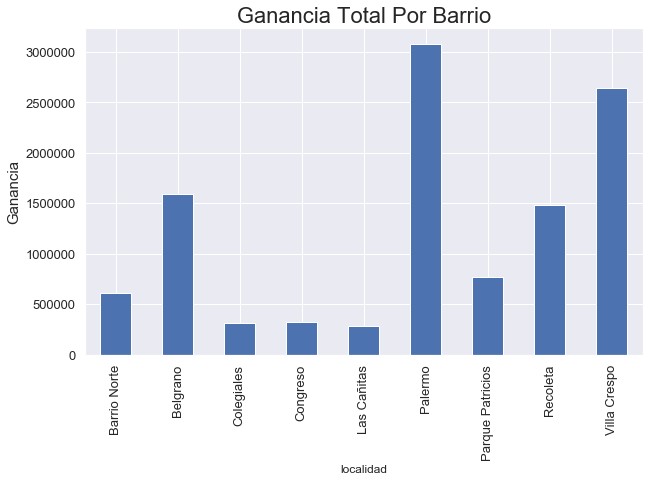

In [127]:
ganancia_barrio=a.groupby(['localidad'])['diferencia_absoluta'].sum()
ganancia_barrio

ax = ganancia_barrio.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Ganancia Total Por Barrio", fontsize=22)
ax.set_ylabel("Ganancia", fontsize=15);
plt.show()

[Text(0, 0, 'Villa Crespo'),
 Text(0, 0, 'Parque Patricios'),
 Text(0, 0, 'Belgrano'),
 Text(0, 0, 'Palermo'),
 Text(0, 0, 'Recoleta'),
 Text(0, 0, 'Congreso'),
 Text(0, 0, 'Barrio Norte'),
 Text(0, 0, 'Colegiales'),
 Text(0, 0, 'Las Cañitas')]

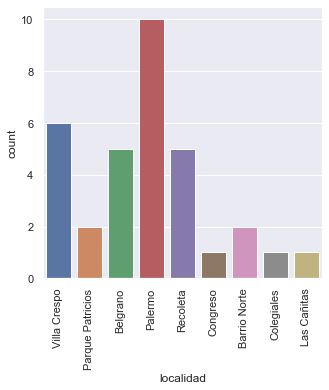

In [139]:
xlabel=a['localidad'].unique()
plt.figure(figsize=(5, 5))
chart=sns.countplot(a['localidad'])
chart.set_xticklabels(xlabel,rotation=90)

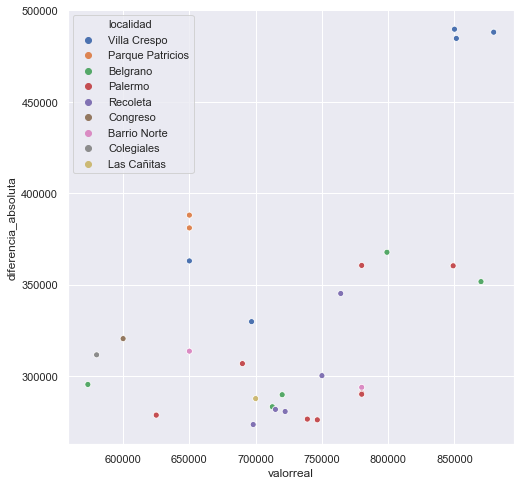

In [138]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=a['valorreal'],y=a['diferencia_absoluta'], hue=a['localidad'])


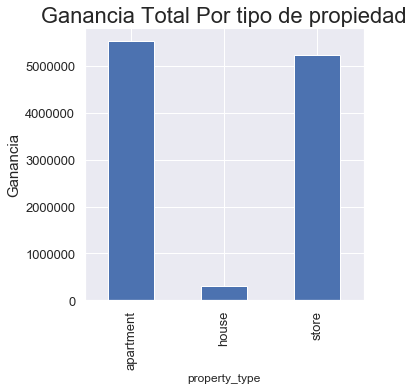

In [134]:
ganancia_tipo_de_propiedad=a.groupby(['property_type'])['diferencia_absoluta'].sum()
ganancia_tipo_de_propiedad

ax = ganancia_tipo_de_propiedad.plot(kind='bar', figsize=(5,5), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Ganancia Total Por tipo de propiedad", fontsize=22)
ax.set_ylabel("Ganancia", fontsize=15);
plt.show()

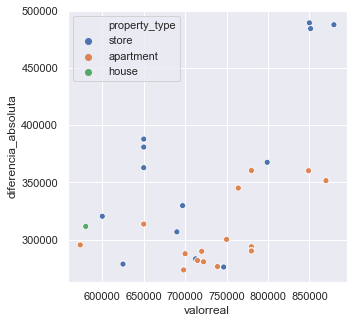

In [136]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=a['valorreal'],y=a['diferencia_absoluta'], hue=a['property_type'])


[Text(0, 0, 'Villa Crespo'),
 Text(0, 0, 'Parque Patricios'),
 Text(0, 0, 'Belgrano'),
 Text(0, 0, 'Palermo'),
 Text(0, 0, 'Recoleta'),
 Text(0, 0, 'Congreso'),
 Text(0, 0, 'Barrio Norte'),
 Text(0, 0, 'Colegiales'),
 Text(0, 0, 'Las Cañitas')]

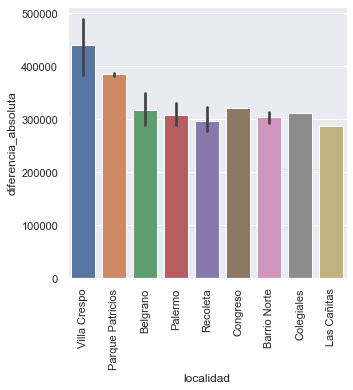

In [140]:
xlabel=a['localidad'].unique()
plt.figure(figsize=(5, 5))
chart=sns.barplot(x=a['localidad'],y=a['diferencia_absoluta'])
chart.set_xticklabels(xlabel,rotation=90)

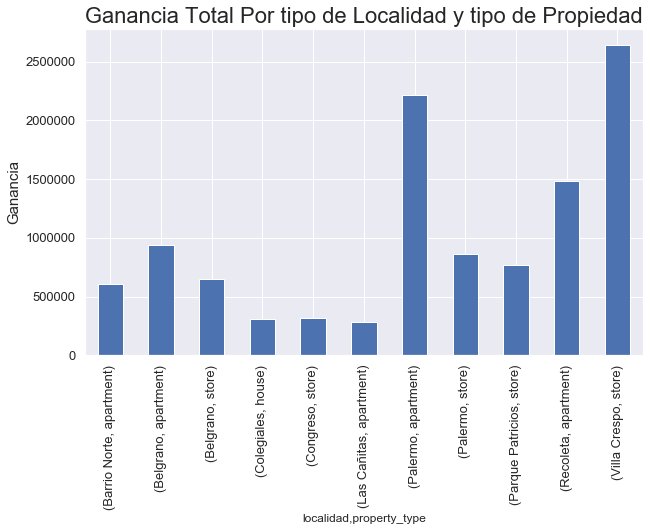

In [141]:
ganancia_localidad_tipo=a.groupby(['localidad','property_type'])['diferencia_absoluta'].sum()
ax = ganancia_localidad_tipo.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Ganancia Total Por tipo de Localidad y tipo de Propiedad", fontsize=22)
ax.set_ylabel("Ganancia", fontsize=15);
plt.show()

In [142]:
a.to_csv('invesriones.csv', index=False)